# Dependencies

In [2]:
import pandas as pd
import numpy as np
import re

import ggseg


from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from scipy.stats import pearsonr

from matplotlib import pyplot as plt
import seaborn as sns

from tqdm import tqdm

# Import Data

In [3]:
# Import the ICCs

HCP = pd.read_csv("Results_Log_DK/ICC_and_Heritability/ICC.csv", index_col=0)
CamCAN = pd.read_csv("ARCHIVE/Results_CamCAN_DK/ICC.csv", index_col=0)

# Remove the last frequency bin in HCP
HCP = HCP[HCP.columns[:-1]]

In [4]:
HCP.head()

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,145.0,145.5,146.0,146.5,147.0,147.5,148.0,148.5,149.0,149.5
ROI,,,,,,,,,,,,,,,,,,,,,
bankssts L,0.236135,0.364982,0.601703,0.713374,0.746493,0.776209,0.781583,0.769609,0.755616,0.744457,...,0.589545,0.545707,0.606629,0.610268,0.619963,0.621649,0.600034,0.585552,0.588643,0.620762
bankssts R,0.271324,0.363265,0.562711,0.678676,0.694988,0.726645,0.716513,0.699923,0.682818,0.717994,...,0.522806,0.487579,0.517655,0.534948,0.527225,0.485814,0.528041,0.497470,0.501895,0.521062
caudalanteriorcingulate L,0.289653,0.367692,0.455279,0.591742,0.654077,0.673927,0.720998,0.750743,0.779225,0.777424,...,0.579648,0.591943,0.611661,0.605175,0.639687,0.593671,0.603097,0.591572,0.548293,0.604067
caudalanteriorcingulate R,0.305357,0.376174,0.437663,0.567336,0.633011,0.667586,0.711675,0.734151,0.744396,0.763978,...,0.572233,0.565719,0.584509,0.544925,0.554719,0.517652,0.567899,0.557139,0.495837,0.554320
caudalmiddlefrontal L,0.486579,0.599303,0.691355,0.710665,0.731470,0.729466,0.735180,0.762237,0.754254,0.772266,...,0.706985,0.745387,0.750632,0.755974,0.735336,0.695219,0.730556,0.725830,0.734850,0.751697


In [5]:
CamCAN.head()

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,145.0,145.5,146.0,146.5,147.0,147.5,148.0,148.5,149.0,149.5
ROI,,,,,,,,,,,,,,,,,,,,,
bankssts L,0.788798,0.836742,0.855036,0.838892,0.834594,0.820698,0.821893,0.825144,0.823840,0.825467,...,0.806060,0.807481,0.808034,0.811372,0.818949,0.807319,0.806486,0.810157,0.810139,0.605892
bankssts R,0.783589,0.847685,0.831786,0.816446,0.818742,0.797457,0.792577,0.793084,0.813769,0.809996,...,0.802826,0.781831,0.797154,0.805061,0.802518,0.804880,0.807795,0.809477,0.811357,0.789317
caudalanteriorcingulate L,0.839584,0.895968,0.907630,0.875229,0.863126,0.874915,0.874247,0.886103,0.902792,0.907805,...,0.820259,0.818202,0.818551,0.816646,0.816558,0.820497,0.821199,0.817950,0.810550,0.634301
caudalanteriorcingulate R,0.828423,0.890084,0.912473,0.868019,0.842925,0.857682,0.861588,0.876697,0.899297,0.908756,...,0.828250,0.826215,0.826576,0.821441,0.820929,0.825356,0.826660,0.824216,0.816107,0.672751
caudalmiddlefrontal L,0.671494,0.760879,0.787814,0.743739,0.764204,0.770440,0.756354,0.779217,0.796314,0.806372,...,0.844321,0.837862,0.833717,0.838537,0.830842,0.827048,0.832894,0.845590,0.835508,0.619407


In [6]:
## Also the ICC from Log CamCAN

CamCAN_log = pd.read_csv("ARCHIVE/Results_CamCAN_Log_DK/ICC.csv", index_col=0)

In [7]:
# Also the bootstrapped 89 subjects from CamCAN

CamCAN_89_BST = pd.read_csv("ARCHIVE/Results_CamCAN_DK/ICC_Bootstrap_89_subjects.csv", index_col=0)

# Correlation ICCS

## Correlation ICC HCP (Log) vs CamCAN

Average correlation per ROI :  0.5426528305550635


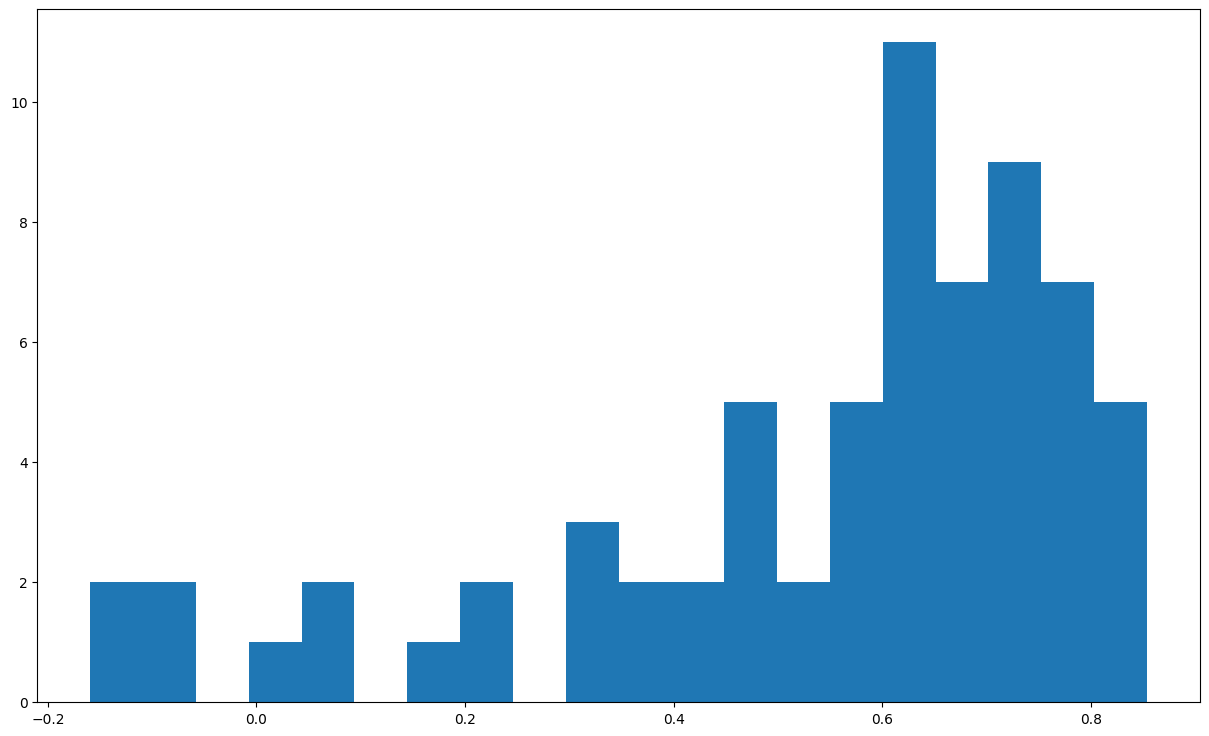

In [19]:
# Correlation per ROI
corr_per_roi = {}

for ROI in HCP.index:
    corr_per_roi[ROI] = pearsonr(HCP.loc[ROI], CamCAN.loc[ROI])[0]

print("Average correlation per ROI : ", np.array(list(corr_per_roi.values())).mean())

plt.figure(figsize = (15, 9))
plt.hist(np.array(list(corr_per_roi.values())), bins = 20)
plt.show()

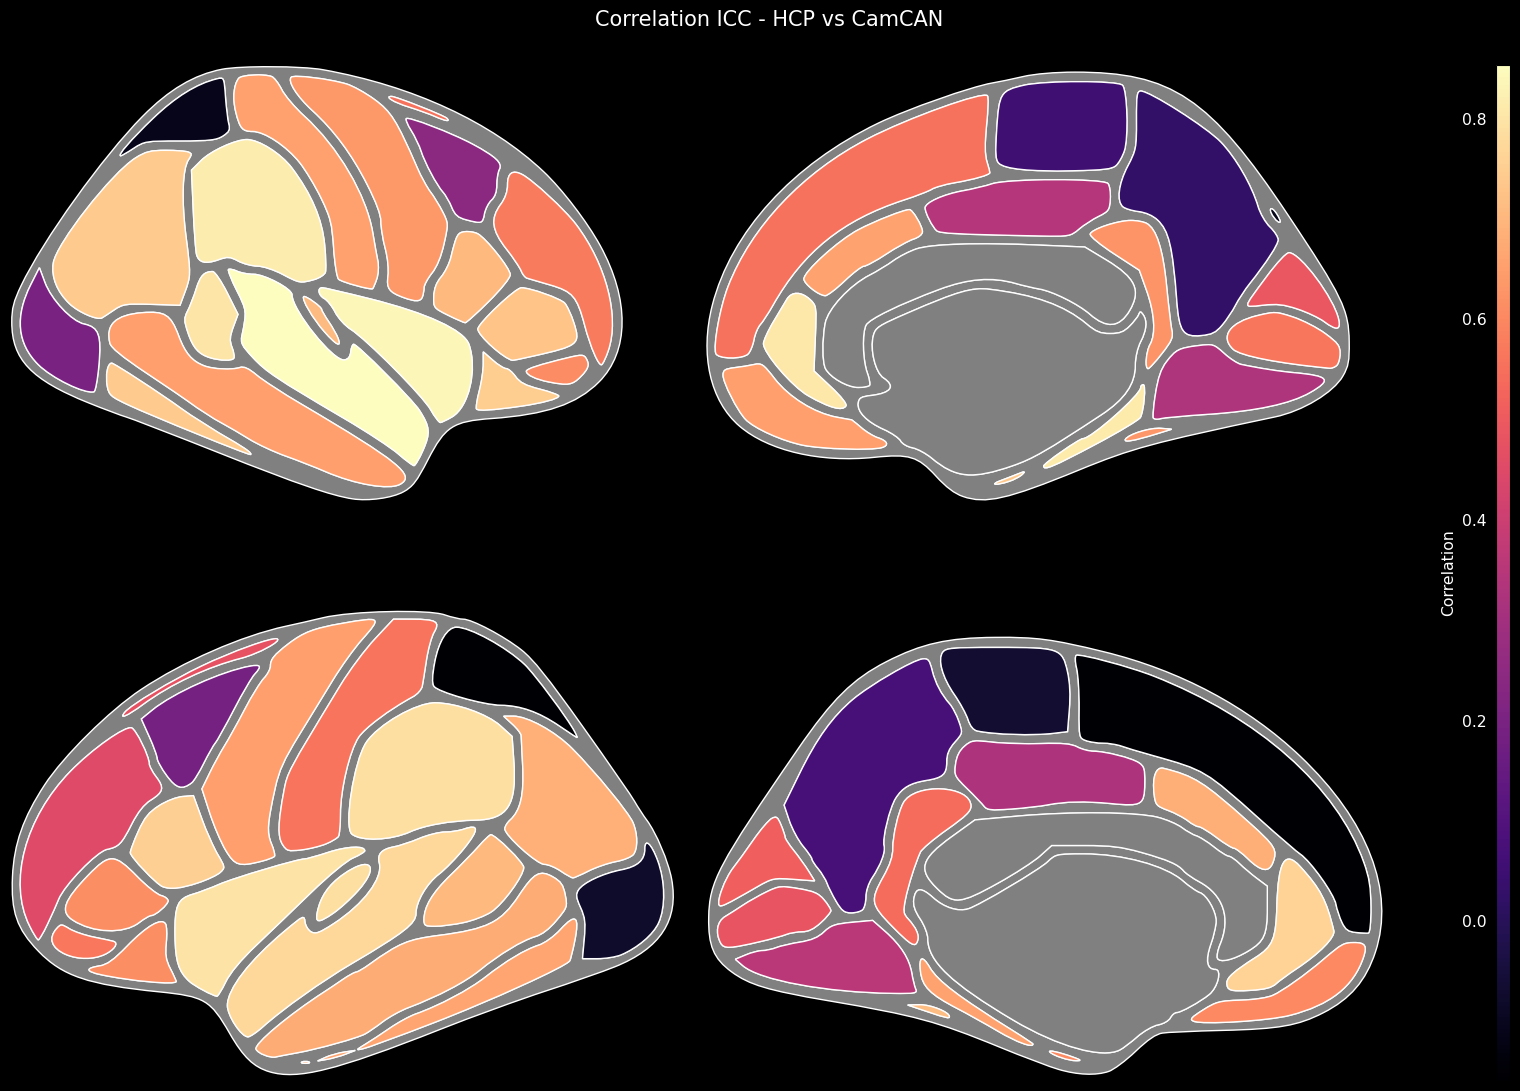

In [20]:
# Look in which areas the correlation is the worst (plot on the brain)

data = {k.replace(" L", "_left").replace(" R", "_right"):v for k, v in corr_per_roi.items()}

ggseg.plot_dk(data, cmap='magma', figsize=(15,15),
              background='k', edgecolor='w', bordercolor='gray',
              ylabel='Correlation', title='Correlation ICC - HCP vs CamCAN ')

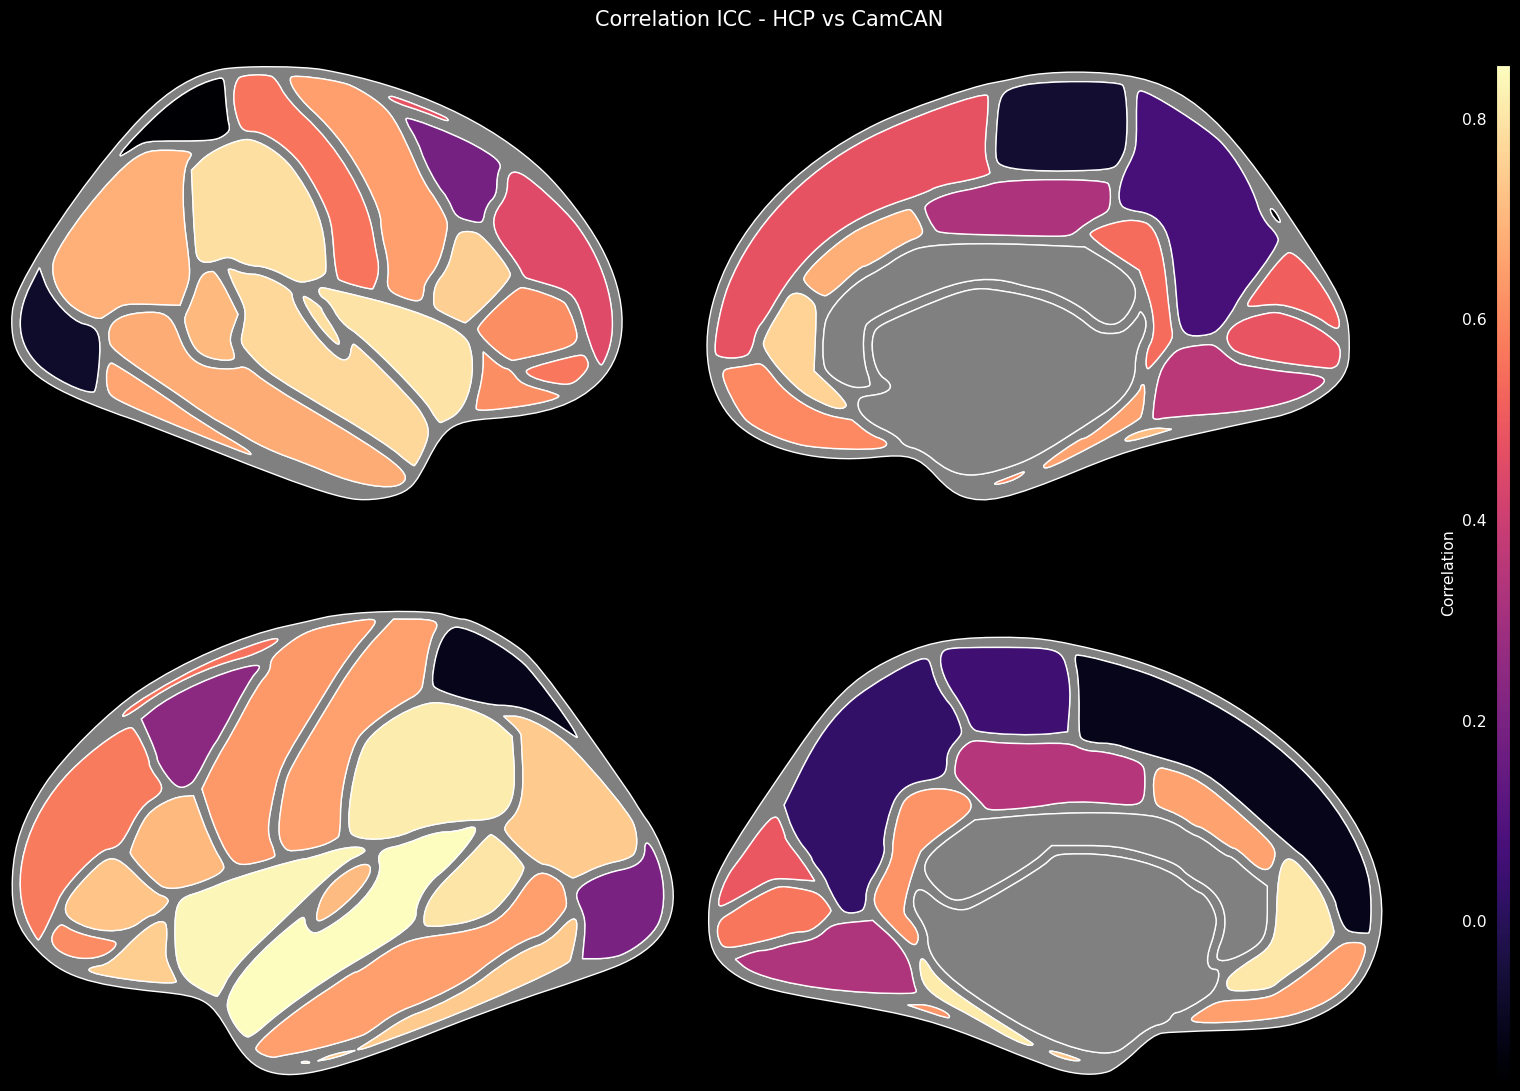

In [21]:
# Look in which areas the correlation is the worst (plot on the brain)
# PB plot when reversing right and left ...

data = {k.replace(" L", "_right").replace(" R", "_left"):v for k, v in corr_per_roi.items()}

ggseg.plot_dk(data, cmap='magma', figsize=(15,15),
              background='k', edgecolor='w', bordercolor='gray',
              ylabel='Correlation', title='Correlation ICC - HCP vs CamCAN ')

**Result -** The average correlation per ROI is correct, but not as good as we would expect (above 0.8 would be acceptable). This correlation varies a lot between regions. However, we need to check on R, as the plot module seems not perfect on Python.

Average correlation per Freq :  0.01867563260857117


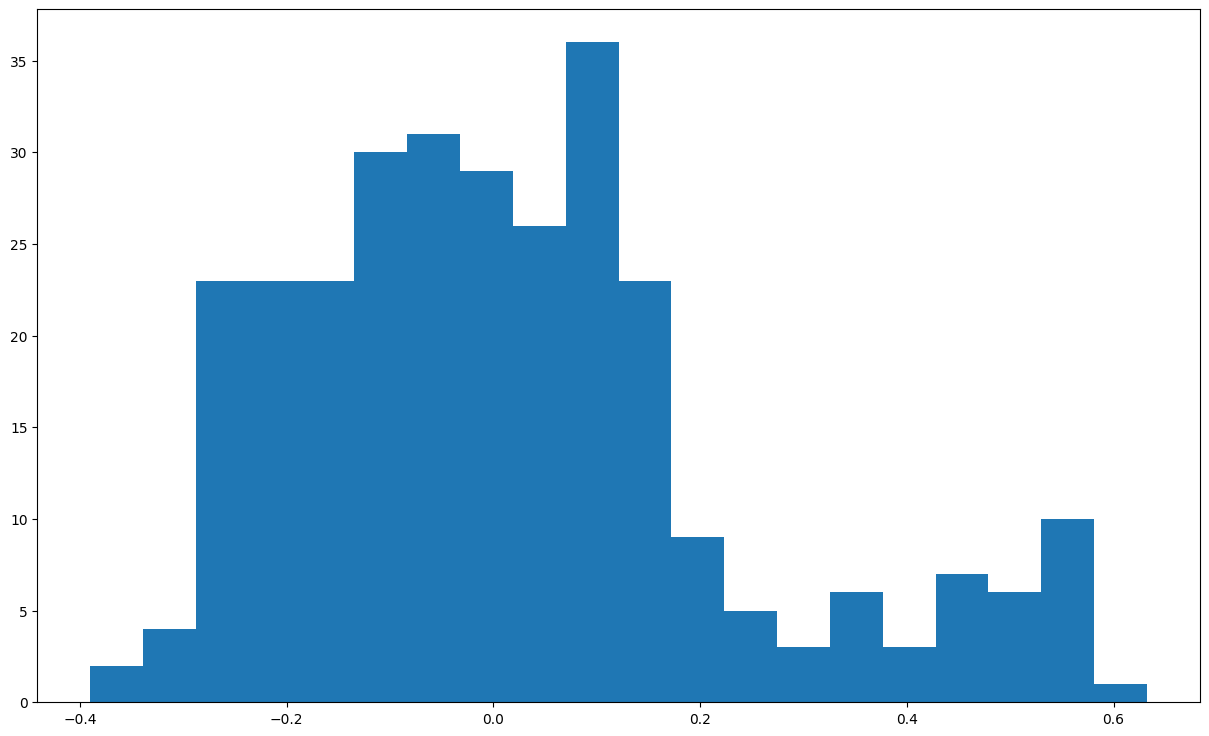

In [22]:
# Correlation per Freq bin
corr_per_freq = {}

for freq in HCP.columns:
    corr_per_freq[float(freq)] = pearsonr(HCP[freq], CamCAN[freq])[0]

print("Average correlation per Freq : ", np.array(list(corr_per_freq.values())).mean())

plt.figure(figsize = (15, 9))
plt.hist(np.array(list(corr_per_freq.values())), bins = 20)
plt.show()

In [23]:
corr_per_freq

{0.0: 0.10875710506737638,
 0.5: 0.15394598665668435,
 1.0: 0.23764424056167455,
 1.5: 0.3489636135213426,
 2.0: 0.2764057717222855,
 2.5: 0.12750387348779546,
 3.0: 0.17043395053179194,
 3.5: 0.101824831565939,
 4.0: 0.1305126210378817,
 4.5: 0.2050525618981038,
 5.0: 0.3305564309131449,
 5.5: 0.5561073484239931,
 6.0: 0.47565707769998034,
 6.5: 0.0802814583156439,
 7.0: -0.17853090063425892,
 7.5: -0.29280987108199663,
 8.0: -0.3899543276752009,
 8.5: -0.25715020720266724,
 9.0: -0.092666026665438,
 9.5: -0.14424899514821565,
 10.0: -0.16391672218219955,
 10.5: -0.16636397656991192,
 11.0: -0.23367205288204496,
 11.5: -0.3011499092199626,
 12.0: -0.09255165488580458,
 12.5: -0.0477560686238676,
 13.0: -0.061327627038207044,
 13.5: -0.08149629496399294,
 14.0: -0.05666868521388036,
 14.5: -0.2367867416904559,
 15.0: -0.17966167709445602,
 15.5: -0.2871221247277267,
 16.0: -0.3633835572266943,
 16.5: -0.2737022450725414,
 17.0: -0.1693902438829768,
 17.5: -0.06134155448474711,
 18.0: -

In [24]:
# Frequency bands
BROADBAND = (0.0, 150.0)
DELTA = (0.0, 4.0)
THETA = (4.0, 8.0)
ALPHA = (8.0, 13.0)
BETA = (13.0, 30.0)
GAMMA = (30.0, 50.0)
HIGH_GAMMA = (50.0, 150.0)

bands = [BROADBAND, DELTA, THETA, ALPHA, BETA, GAMMA, HIGH_GAMMA]
bands_names = ["BROADBAND", "DELTA", "THETA", "ALPHA", "BETA", "GAMMA", "HIGH GAMMA"]

corr_per_freq_band = {}

for name, band in zip(bands_names, bands):
    corr_avg = np.array([v for k, v in corr_per_freq.items() if k >= band[0] and k < band[1]]).mean()
    corr_per_freq_band[name] = corr_avg

corr_per_freq_band

{'BROADBAND': 0.01867563260857117,
 'DELTA': 0.1906849216393612,
 'THETA': 0.16335334082156153,
 'ALPHA': -0.1889429941055313,
 'BETA': -0.03934634020613274,
 'GAMMA': 0.39306263756886417,
 'HIGH GAMMA': -0.04862458155903385}

In [25]:
# Global correlation

pearsonr(np.array(HCP).reshape(-1,), np.array(CamCAN).reshape(-1,))

PearsonRResult(statistic=0.2536967095654923, pvalue=4.6924778933286993e-297)

### Correlate ICCs per Frequency band (DELTA, THETA, ALPHA, ...)

In [26]:
HCP.head()

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,145.0,145.5,146.0,146.5,147.0,147.5,148.0,148.5,149.0,149.5
ROI,,,,,,,,,,,,,,,,,,,,,
bankssts L,0.236135,0.364982,0.601703,0.713374,0.746493,0.776209,0.781583,0.769609,0.755616,0.744457,...,0.589545,0.545707,0.606629,0.610268,0.619963,0.621649,0.600034,0.585552,0.588643,0.620762
bankssts R,0.271324,0.363265,0.562711,0.678676,0.694988,0.726645,0.716513,0.699923,0.682818,0.717994,...,0.522806,0.487579,0.517655,0.534948,0.527225,0.485814,0.528041,0.497470,0.501895,0.521062
caudalanteriorcingulate L,0.289653,0.367692,0.455279,0.591742,0.654077,0.673927,0.720998,0.750743,0.779225,0.777424,...,0.579648,0.591943,0.611661,0.605175,0.639687,0.593671,0.603097,0.591572,0.548293,0.604067
caudalanteriorcingulate R,0.305357,0.376174,0.437663,0.567336,0.633011,0.667586,0.711675,0.734151,0.744396,0.763978,...,0.572233,0.565719,0.584509,0.544925,0.554719,0.517652,0.567899,0.557139,0.495837,0.554320
caudalmiddlefrontal L,0.486579,0.599303,0.691355,0.710665,0.731470,0.729466,0.735180,0.762237,0.754254,0.772266,...,0.706985,0.745387,0.750632,0.755974,0.735336,0.695219,0.730556,0.725830,0.734850,0.751697


Frequency band : BROADBAND
Average correlation per ROI :  0.5426528305550635


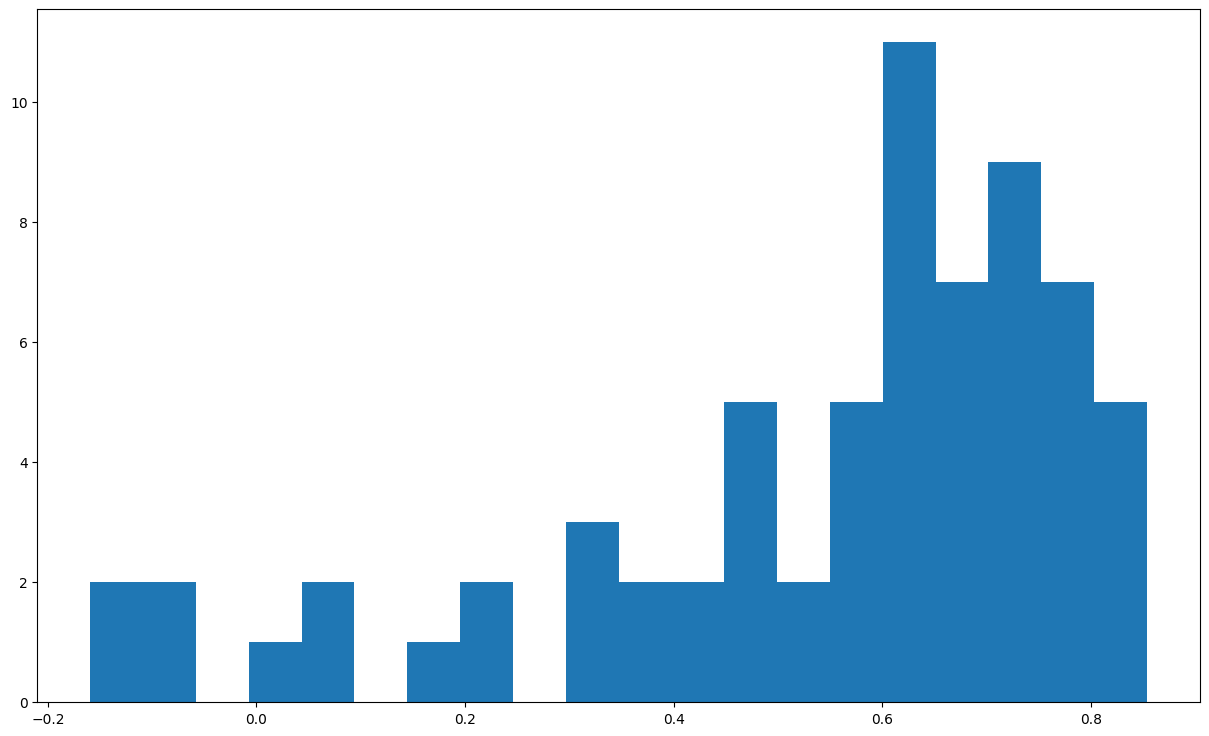

Frequency band : DELTA
Average correlation per ROI :  0.5230995524102208


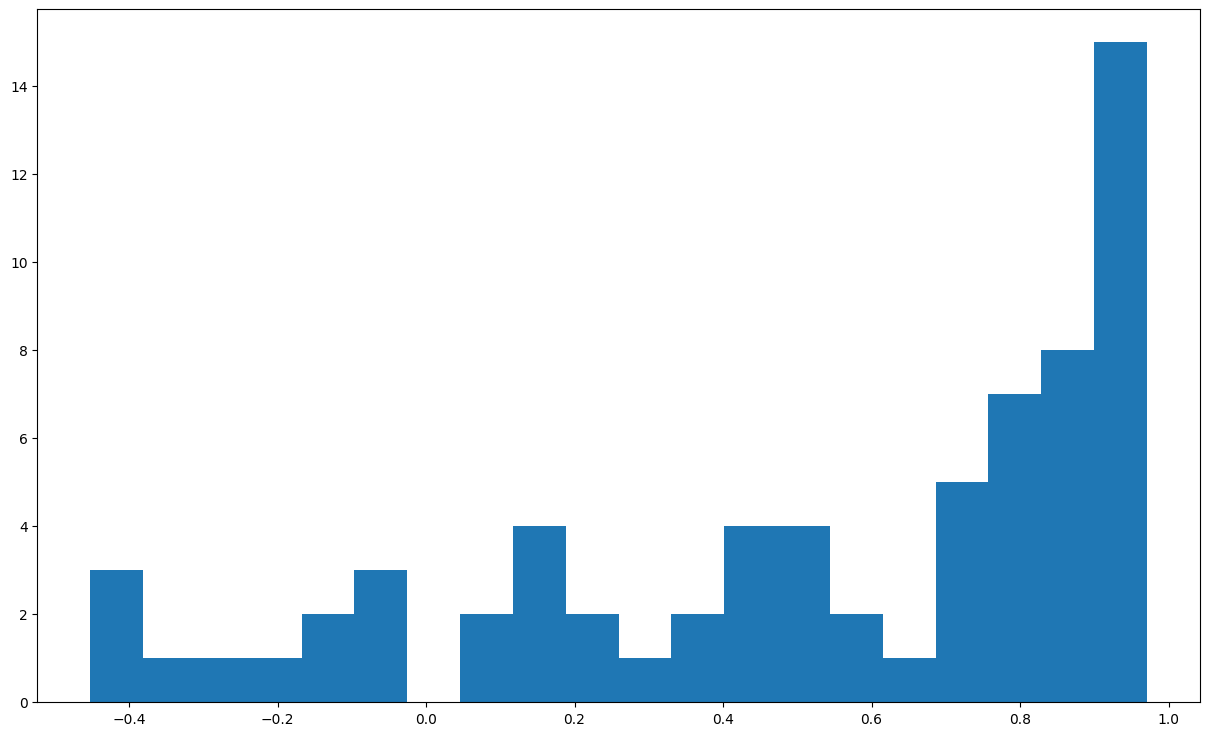

Frequency band : THETA
Average correlation per ROI :  0.8334730641248966


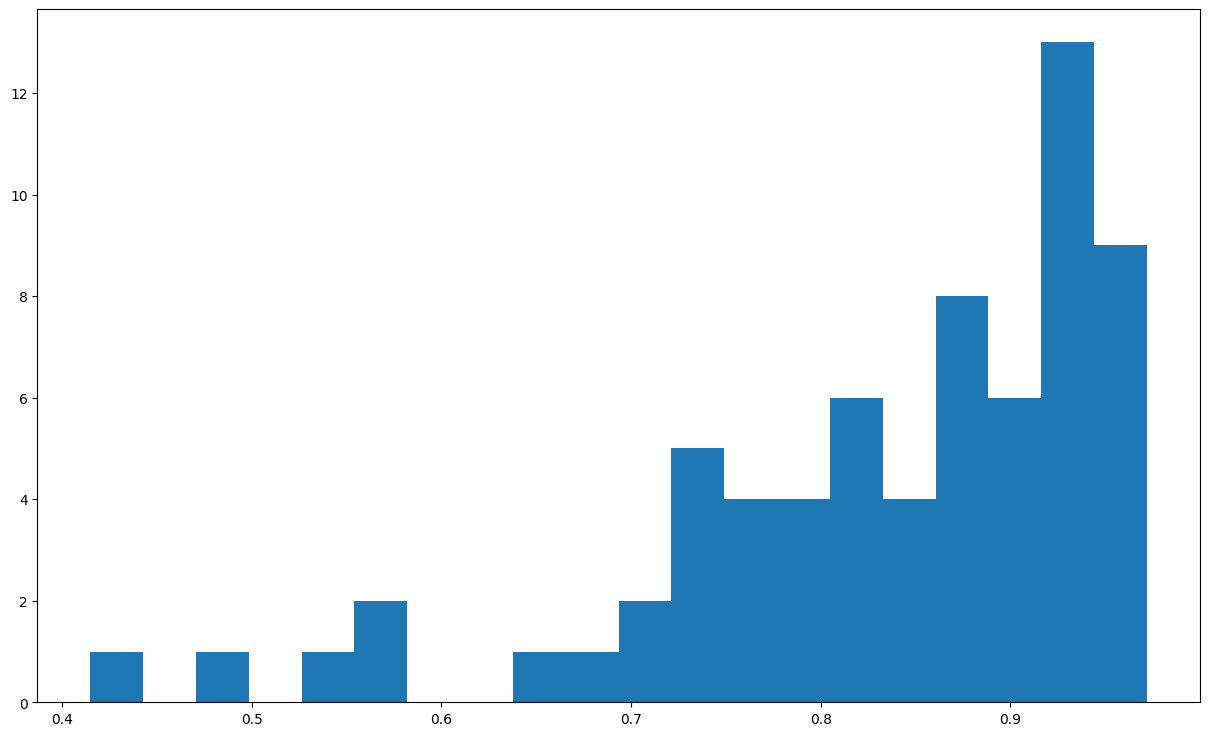

Frequency band : ALPHA
Average correlation per ROI :  0.30777926654432003


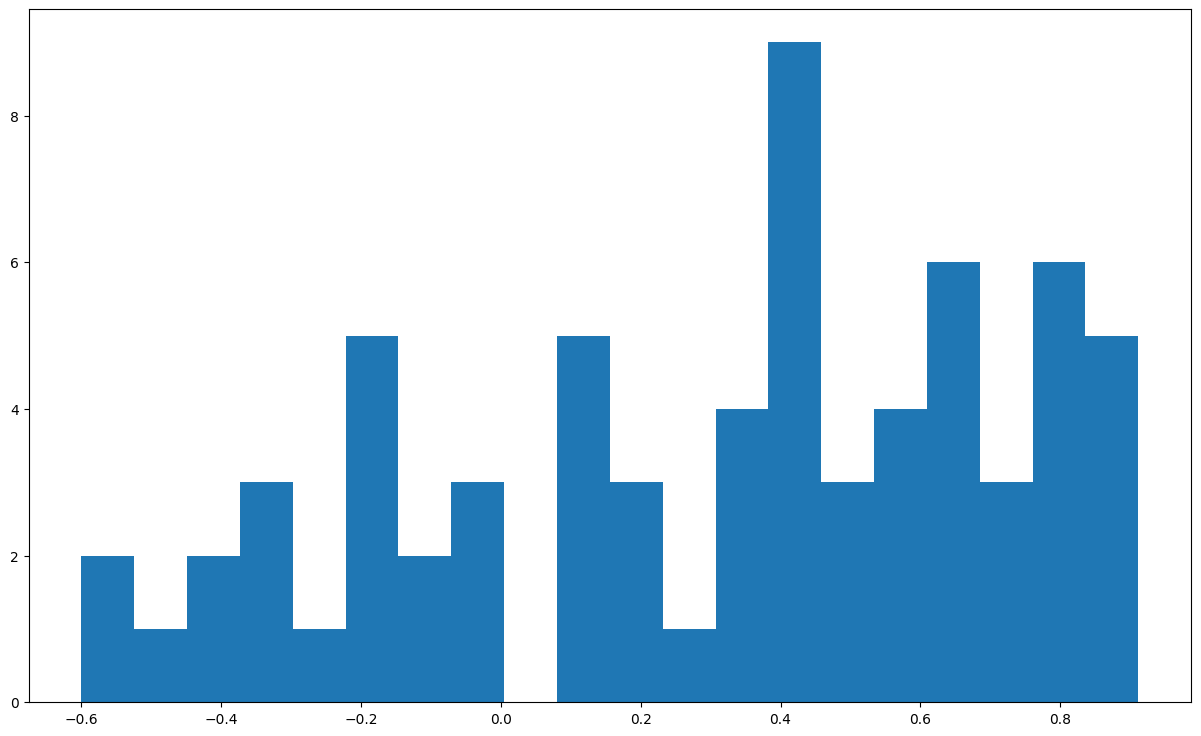

Frequency band : BETA
Average correlation per ROI :  0.15058479049532528


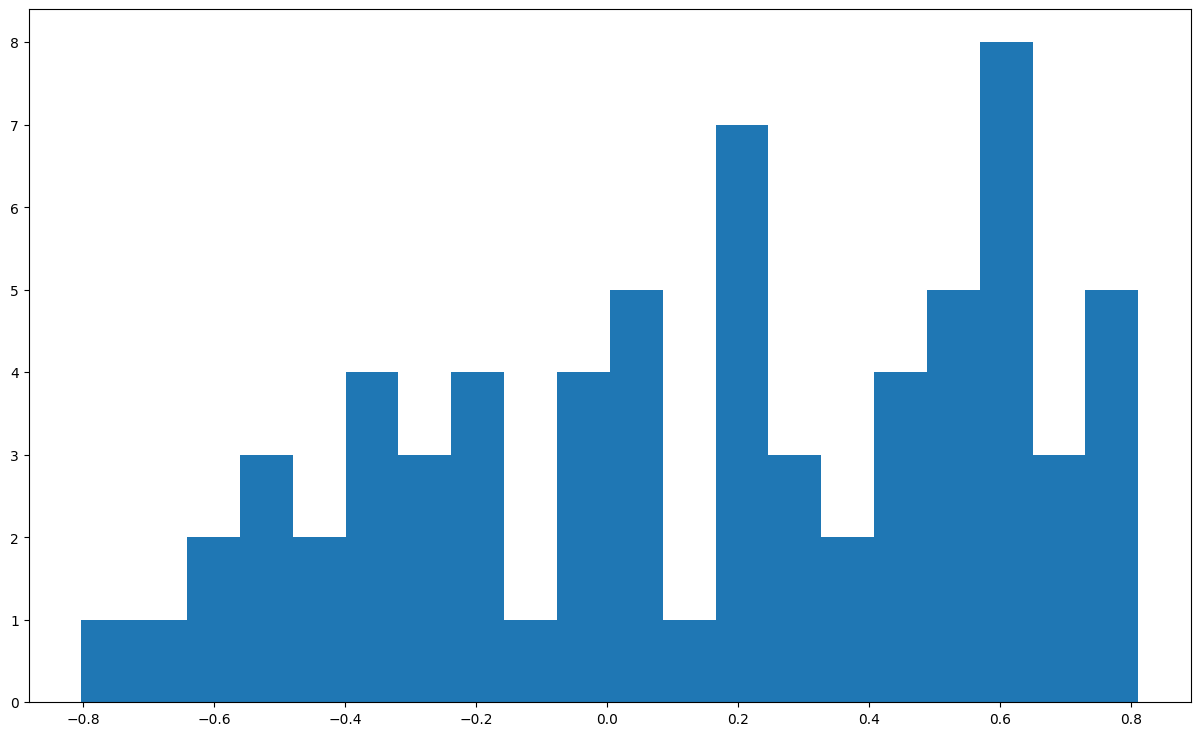

Frequency band : GAMMA
Average correlation per ROI :  0.5393727155265212


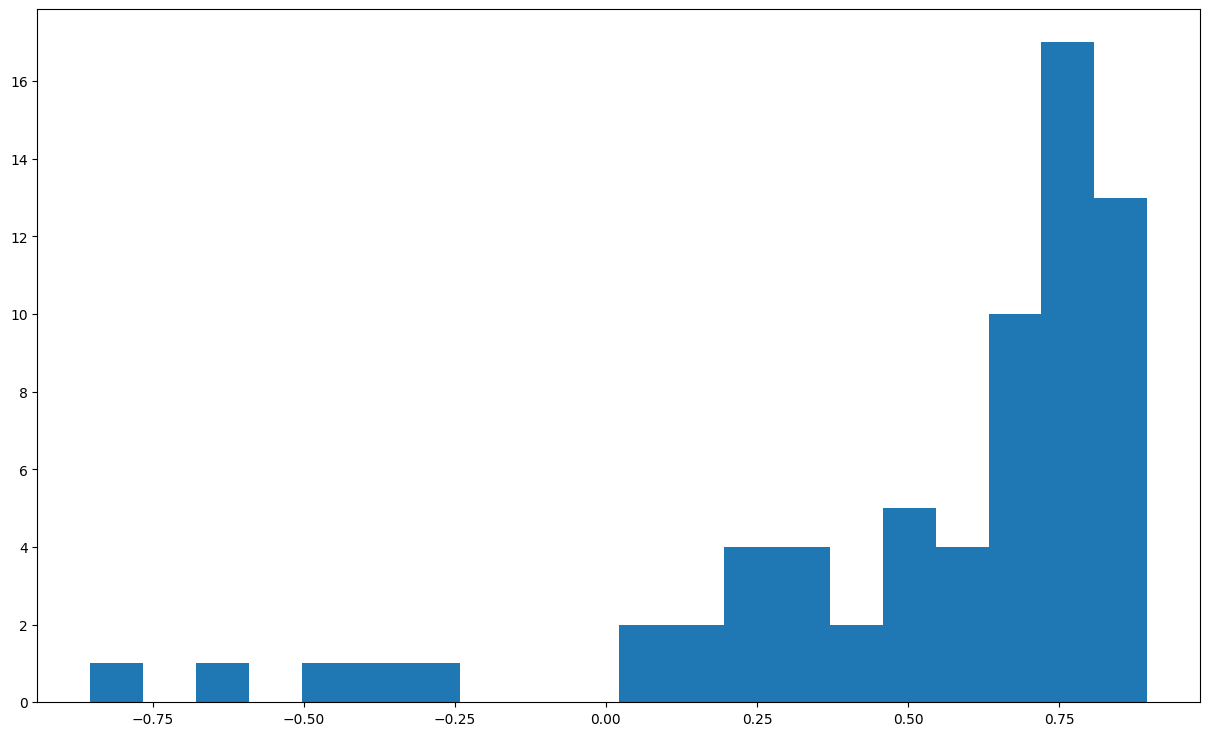

Frequency band : HIGH GAMMA
Average correlation per ROI :  0.10154305693746773


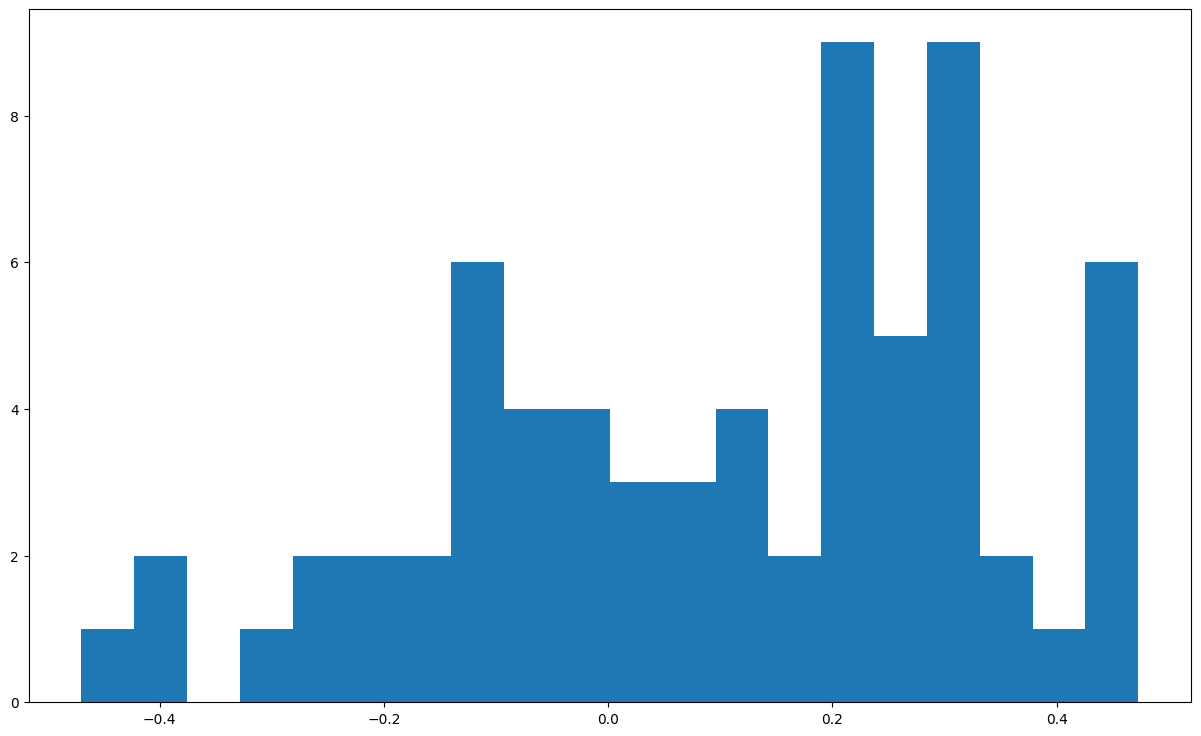

In [27]:
# Correlation per ROI
corr_per_roi = {}

for name, band in zip(bands_names, bands):
    corr_per_roi[name] = {}
    columns = [c for c in HCP.columns if float(c) >= band[0] and float(c) < band[1] ]
    for ROI in HCP.index:
        corr_per_roi[name][ROI] = pearsonr(HCP[columns].loc[ROI], CamCAN[columns].loc[ROI])[0]

    print("Frequency band :", name)
    print("Average correlation per ROI : ", np.array(list(corr_per_roi[name].values())).mean())

    plt.figure(figsize = (15, 9))
    plt.hist(np.array(list(corr_per_roi[name].values())), bins = 20)
    plt.show()

In [28]:
# Correlation per ROI
corr_per_freq_band = {}

for name, band in zip(bands_names, bands):
    columns = [c for c in HCP.columns if float(c) >= band[0] and float(c) < band[1] ]
    corr_per_freq_band[name] = pearsonr(np.mean(HCP[columns].to_numpy(), axis = 1), np.mean(CamCAN[columns].to_numpy(), axis = 1))[0]

    print()
    print("Frequency band :", name)
    print("Average correlation per frequency band : ", corr_per_freq_band[name])


Frequency band : BROADBAND
Average correlation per frequency band :  -0.12560653414650666

Frequency band : DELTA
Average correlation per frequency band :  0.34005801412410075

Frequency band : THETA
Average correlation per frequency band :  0.13454933997631005

Frequency band : ALPHA
Average correlation per frequency band :  -0.31375808951797424

Frequency band : BETA
Average correlation per frequency band :  -0.10927249328550584

Frequency band : GAMMA
Average correlation per frequency band :  0.43070012618294157

Frequency band : HIGH GAMMA
Average correlation per frequency band :  -0.07638257083433639


## Correlation ICC HCP (Log) vs Log CamCAN

Average correlation per ROI :  0.49310853053620507


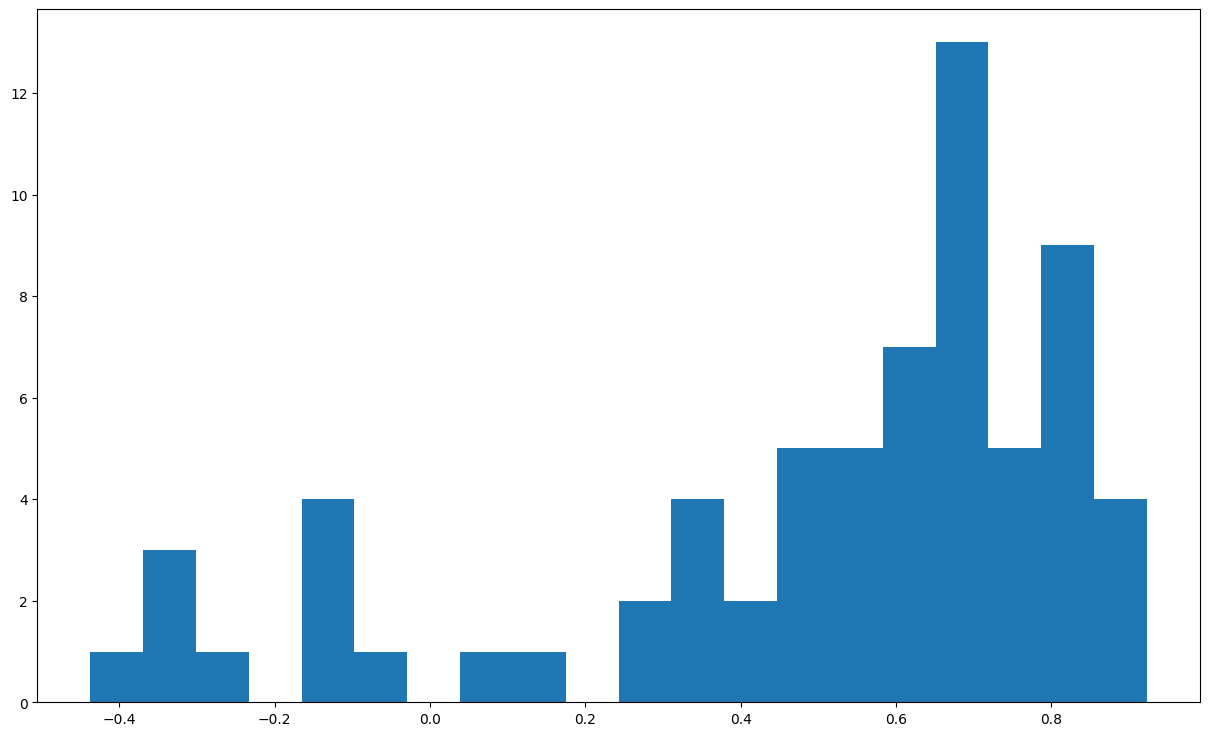

In [29]:
# Correlation per ROI
corr_per_roi = {}

for ROI in HCP.index:
    corr_per_roi[ROI] = pearsonr(HCP.loc[ROI], CamCAN_log.loc[ROI])[0]

print("Average correlation per ROI : ", np.array(list(corr_per_roi.values())).mean())

plt.figure(figsize = (15, 9))
plt.hist(np.array(list(corr_per_roi.values())), bins = 20)
plt.show()

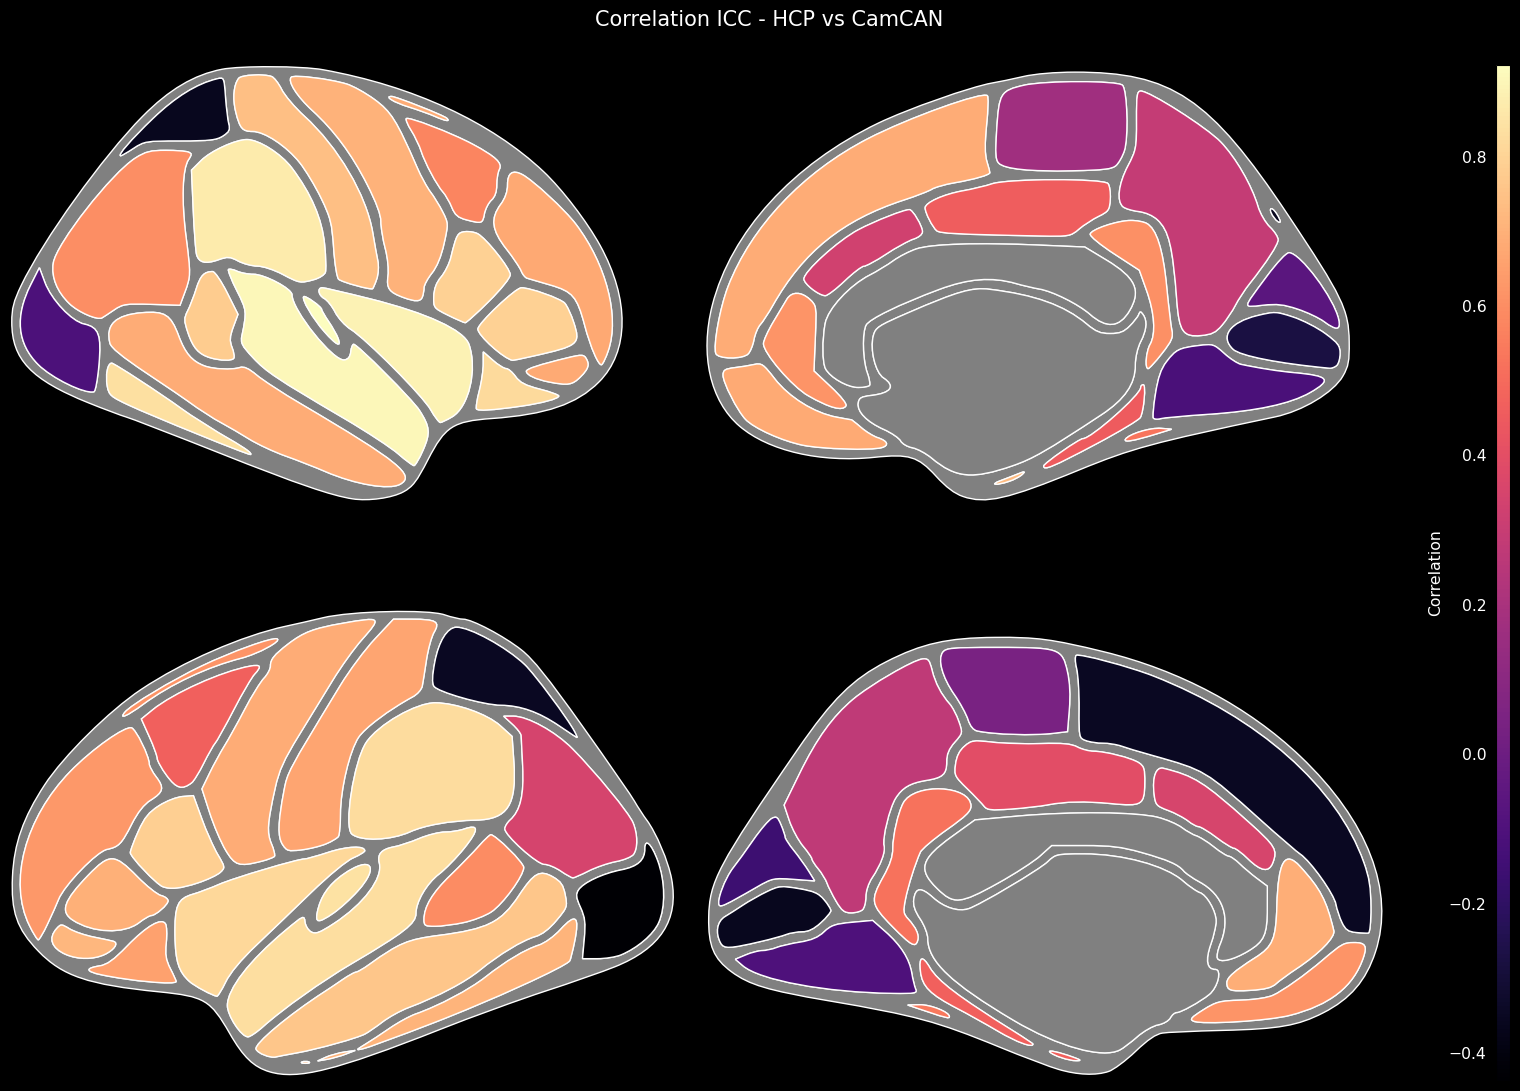

In [30]:
# Look in which areas the correlation is the worst (plot on the brain)

data = {k.replace(" L", "_left").replace(" R", "_right"):v for k, v in corr_per_roi.items()}

ggseg.plot_dk(data, cmap='magma', figsize=(15,15),
              background='k', edgecolor='w', bordercolor='gray',
              ylabel='Correlation', title='Correlation ICC - HCP vs CamCAN ')

Average correlation per Freq :  0.013496848490207984


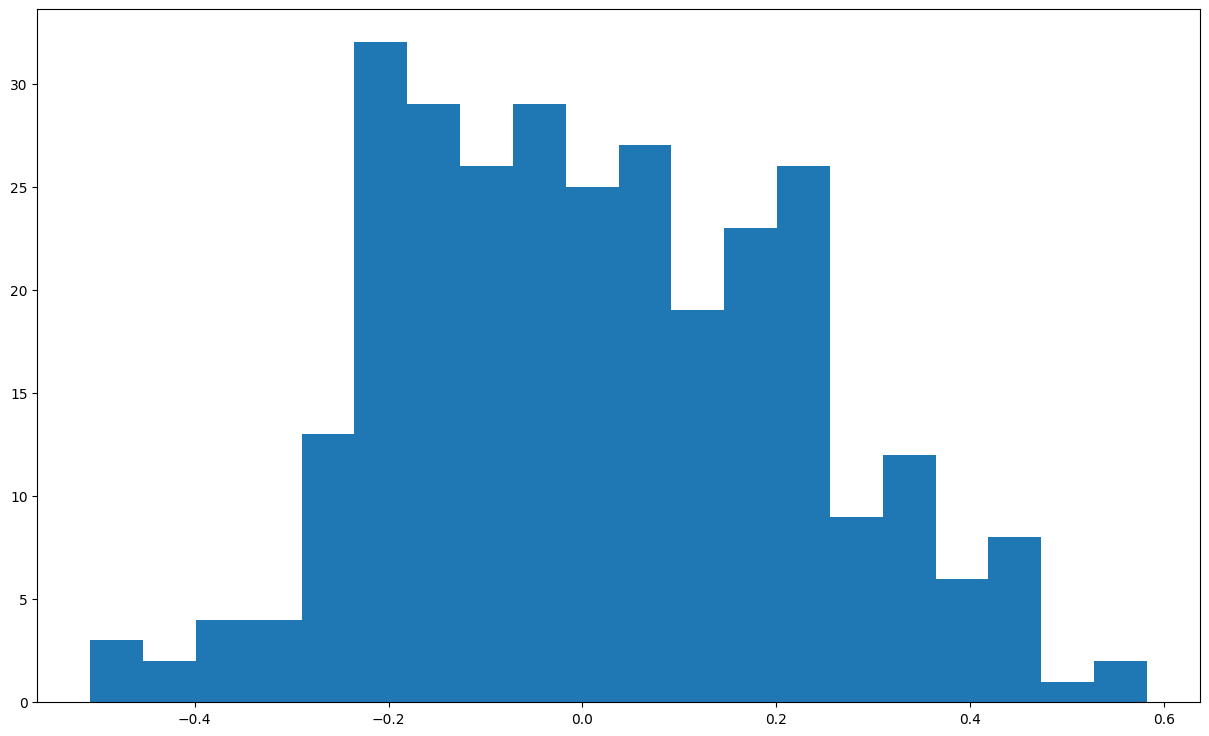

In [31]:
# Correlation per Freq bin
corr_per_freq = {}

for freq in HCP.columns:
    corr_per_freq[float(freq)] = pearsonr(HCP[freq], CamCAN_log[freq])[0]

print("Average correlation per Freq : ", np.array(list(corr_per_freq.values())).mean())

plt.figure(figsize = (15, 9))
plt.hist(np.array(list(corr_per_freq.values())), bins = 20)
plt.show()

In [32]:
corr_per_freq

{0.0: 0.20582982814052334,
 0.5: 0.2515139781327142,
 1.0: 0.4279012662477845,
 1.5: 0.5826674992714503,
 2.0: 0.5628751012719833,
 2.5: 0.46670380820077106,
 3.0: 0.4577780492129169,
 3.5: 0.454584632033986,
 4.0: 0.4419820872798266,
 4.5: 0.43267311113844936,
 5.0: 0.38902323473517275,
 5.5: 0.47990924205817037,
 6.0: 0.4236640278075381,
 6.5: 0.06537662850246163,
 7.0: -0.10642100479122099,
 7.5: -0.13058739853693457,
 8.0: -0.1792392196426225,
 8.5: -0.10171667806563928,
 9.0: 0.021298640430867752,
 9.5: -0.024037915968425378,
 10.0: -0.173812843289779,
 10.5: -0.23641682850090326,
 11.0: -0.20636157951413248,
 11.5: -0.2503464232531888,
 12.0: -0.21150699266325365,
 12.5: -0.2868574485228595,
 13.0: -0.3266732924210015,
 13.5: -0.3699593260357346,
 14.0: -0.4227125409612955,
 14.5: -0.4950891395149097,
 15.0: -0.44136471083764006,
 15.5: -0.4694272222193414,
 16.0: -0.5078885327021572,
 16.5: -0.37342302785720544,
 17.0: -0.3018744928205172,
 17.5: -0.17180984170019614,
 18.0: -0.

In [33]:
# Frequency bands
BROADBAND = (0.0, 150.0)
DELTA = (0.0, 4.0)
THETA = (4.0, 8.0)
ALPHA = (8.0, 13.0)
BETA = (13.0, 30.0)
GAMMA = (30.0, 50.0)
HIGH_GAMMA = (50.0, 150.0)

bands = [BROADBAND, DELTA, THETA, ALPHA, BETA, GAMMA, HIGH_GAMMA]
bands_names = ["BROADBAND", "DELTA", "THETA", "ALPHA", "BETA", "GAMMA", "HIGH GAMMA"]

corr_per_freq_band = {}

for name, band in zip(bands_names, bands):
    corr_avg = np.array([v for k, v in corr_per_freq.items() if k >= band[0] and k < band[1]]).mean()
    corr_per_freq_band[name] = corr_avg

corr_per_freq_band

{'BROADBAND': 0.013496848490207984,
 'DELTA': 0.4262317703140162,
 'THETA': 0.2494524910241829,
 'ALPHA': -0.1648997288989936,
 'BETA': -0.1847259977881337,
 'GAMMA': 0.2606606214482693,
 'HIGH GAMMA': -0.019265815938937437}

# Compare ICCs

In [34]:
HCP_ICC_per_freq_avg = HCP.mean(axis = 0)
CamCAN_ICC_per_freq_avg = CamCAN.mean(axis =0)
CamCAN_ICC_89_per_freq_avg = CamCAN_89_BST.mean(axis =0)
CamCAN_log_ICC_per_freq_avg = CamCAN_log.mean(axis =0)


HCP_ICC_per_freq_std = HCP.std(axis = 0)
CamCAN_ICC_per_freq_std = CamCAN.std(axis =0)
CamCAN_log_ICC_per_freq_std = CamCAN_log.std(axis =0)
CamCAN_ICC_89_per_freq_std = CamCAN_89_BST.std(axis =0)


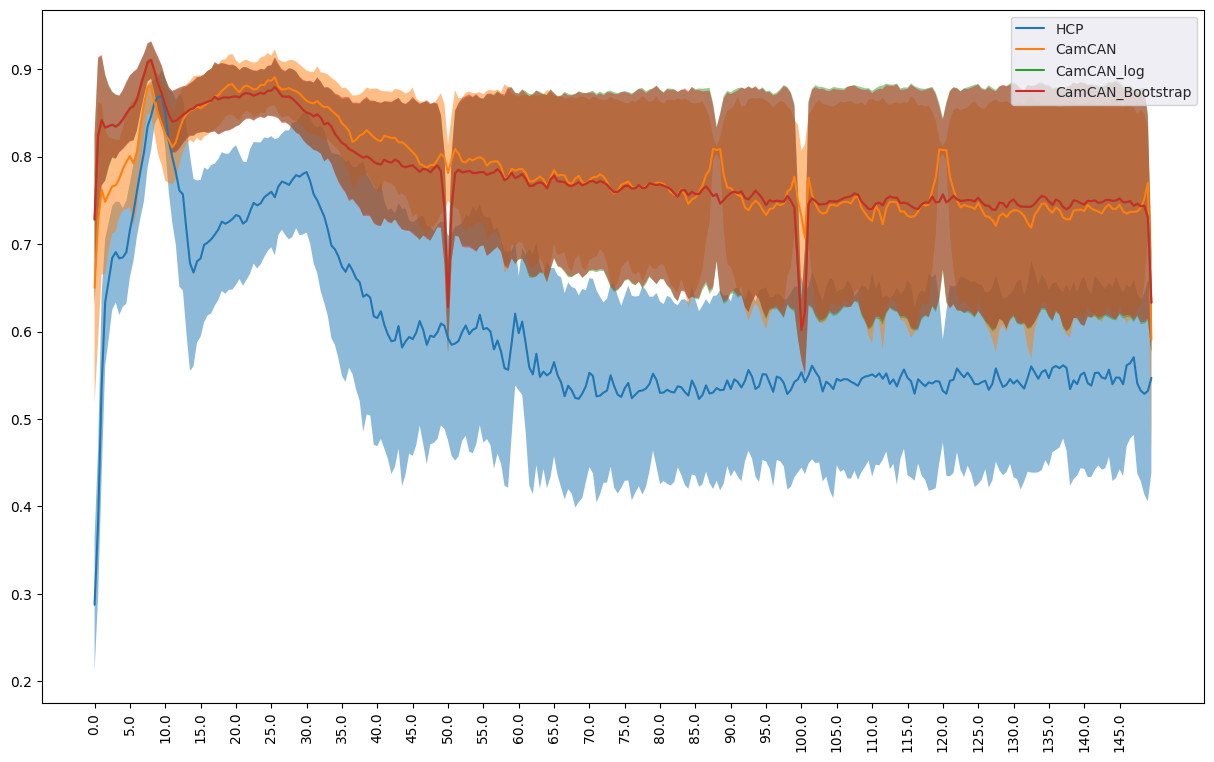

In [35]:
fig, ax = plt.subplots(figsize = (15, 9))

with sns.axes_style("darkgrid"):
    ax.plot(HCP_ICC_per_freq_avg, label='HCP')
    ax.fill_between(HCP_ICC_per_freq_avg.index, HCP_ICC_per_freq_avg - HCP_ICC_per_freq_std, HCP_ICC_per_freq_avg + HCP_ICC_per_freq_std, alpha = 0.5)
    
    ax.plot(CamCAN_ICC_per_freq_avg, label='CamCAN')
    ax.fill_between(CamCAN_ICC_per_freq_avg.index, CamCAN_ICC_per_freq_avg - CamCAN_ICC_per_freq_std, CamCAN_ICC_per_freq_avg + CamCAN_ICC_per_freq_std, alpha = 0.5)
    
    ax.plot(CamCAN_log_ICC_per_freq_avg, label='CamCAN_log')
    ax.fill_between(CamCAN_log_ICC_per_freq_avg.index, CamCAN_log_ICC_per_freq_avg - CamCAN_log_ICC_per_freq_std, CamCAN_log_ICC_per_freq_avg + CamCAN_log_ICC_per_freq_std, alpha = 0.5)
    
    ax.plot(CamCAN_log_ICC_per_freq_avg, label='CamCAN_Bootstrap')
    ax.fill_between(CamCAN_log_ICC_per_freq_avg.index, CamCAN_log_ICC_per_freq_avg - CamCAN_ICC_89_per_freq_std, CamCAN_log_ICC_per_freq_avg + CamCAN_ICC_89_per_freq_std, alpha = 0.5)
    
    ax.tick_params(axis='x', labelrotation=90)
    plt.xticks(HCP_ICC_per_freq_avg.index[0::10])
    ax.legend()

**Results -** While ICCs have almost the same value between datasets in the low frequencies, ICC in HCP decreases quickly. \
This may be due to several factors :
- Way less individuals in HCP may lead to a lower ICC in general ==> **No because we have tried with 89 individuals for CamCAN**
- The MEG machine used for HCP may not have a real good SNR, and when it goes in the higher frequencies, the noise is too important, leading to a lot of variability in the values\

Also, the pick at Alpha in ICC is slightly shifted. This may due to a computation error, like we shifted the frequences, by 1 bin. Indeed we assumed that the range was [0, 149.5], but maybe it is [0.5, 150].\
ASK JASON

# Try to understand the difference observed

**Results -** The log does not change the results

## Let's import the raw PSDs

In [36]:
# Import the datasets

HCP_PSD = pd.read_csv("new_Data/record_1_DK.csv", index_col=0)

ROIs = pd.read_csv("new_Data/dka_HCP_test.csv")
ROIs = ROIs["name"]
columns = [ROI + "_" + str(j/2) for ROI in ROIs for j in range(0, 300)]

CamCAN_PSD = pd.read_csv('new_Data/PSD_Rest.csv', header=None)
CamCAN_PSD.columns = columns

# Drop columns 150 Hz pour HCP
col_to_drop = [c for c in HCP_PSD.columns if float(re.search("[0-9]+\.[0-9]*", c).group(0)) == 150.0]
HCP_PSD = HCP_PSD.drop(columns = col_to_drop)

In [37]:
HCP_PSD.head()

,bankssts L_0.0,bankssts L_0.5,bankssts L_1.0,bankssts L_1.5,bankssts L_2.0,bankssts L_2.5,bankssts L_3.0,bankssts L_3.5,bankssts L_4.0,bankssts L_4.5,...,transversetemporal R_145.0,transversetemporal R_145.5,transversetemporal R_146.0,transversetemporal R_146.5,transversetemporal R_147.0,transversetemporal R_147.5,transversetemporal R_148.0,transversetemporal R_148.5,transversetemporal R_149.0,transversetemporal R_149.5
Subject_ID,,,,,,,,,,,,,,,,,,,,,
100307,0.012527,0.098085,0.091595,0.062784,0.041201,0.032813,0.027429,0.026777,0.027289,0.026809,...,0.001032,0.001035,0.001030,0.001116,0.001130,0.001062,0.000993,0.001100,0.001118,0.001149
102816,0.162313,1.046752,0.273002,0.075042,0.034293,0.027701,0.038973,0.052679,0.037281,0.058347,...,0.001615,0.001585,0.001584,0.001654,0.001657,0.001675,0.001666,0.001671,0.001561,0.001507
105923,0.008516,0.065119,0.069025,0.049595,0.038891,0.035171,0.029716,0.027860,0.028589,0.028132,...,0.001147,0.001116,0.001122,0.001113,0.001153,0.001140,0.001171,0.001186,0.001192,0.001131
106521,0.014950,0.095386,0.090106,0.053828,0.039113,0.029947,0.026072,0.023446,0.023146,0.022486,...,0.001684,0.001509,0.001481,0.001573,0.001603,0.001671,0.001693,0.001654,0.001650,0.001752
108323,0.013310,0.092061,0.088514,0.056523,0.039264,0.030251,0.026005,0.025178,0.024698,0.022905,...,0.001363,0.001377,0.001384,0.001400,0.001374,0.001461,0.001417,0.001364,0.001264,0.001325


In [38]:
CamCAN_PSD.head()


,bankssts L_0.0,bankssts L_0.5,bankssts L_1.0,bankssts L_1.5,bankssts L_2.0,bankssts L_2.5,bankssts L_3.0,bankssts L_3.5,bankssts L_4.0,bankssts L_4.5,...,transversetemporal R_145.0,transversetemporal R_145.5,transversetemporal R_146.0,transversetemporal R_146.5,transversetemporal R_147.0,transversetemporal R_147.5,transversetemporal R_148.0,transversetemporal R_148.5,transversetemporal R_149.0,transversetemporal R_149.5
0,1.166112,7.310916,5.172159,2.908277,1.780837,1.194868,1.090405,1.041240,0.966275,0.866052,...,0.013225,0.014056,0.012924,0.011307,0.011478,0.011786,0.010631,0.009448,0.006987,0.003150
1,1.726824,11.262225,8.457395,5.106392,3.424434,2.753602,2.462952,2.272813,2.133286,1.975146,...,0.019069,0.017784,0.018208,0.019443,0.018315,0.017127,0.016271,0.015401,0.010584,0.007986
2,1.283245,8.512901,5.622469,3.662541,2.693076,2.195658,1.881473,1.665905,1.550854,1.544194,...,0.011910,0.012364,0.012478,0.012050,0.011816,0.012486,0.011117,0.009719,0.007808,0.003464
3,0.779096,5.631812,4.190357,2.781331,2.186175,2.060094,1.706472,1.454541,1.415902,1.377155,...,0.007378,0.007126,0.007329,0.007236,0.006535,0.006806,0.006740,0.006133,0.004261,0.002017
4,0.843786,5.370334,4.005501,2.143103,1.772349,1.449305,1.291349,1.441181,1.354650,1.279961,...,0.005973,0.006015,0.006312,0.005653,0.005771,0.005979,0.005880,0.005315,0.003970,0.001791


## Visualize the differences

In [39]:
# Let's normalize to have the same range
HCP_PSD = np.log(HCP_PSD)
CamCAN_PSD = np.log(CamCAN_PSD)

In [40]:
# Let's compute the avg and std to merge the individuals

avg_HCP = np.mean(HCP_PSD, axis = 0)
avg_CamCAN = np.mean(CamCAN_PSD, axis = 0)

std_HCP = np.std(HCP_PSD, axis = 0)
std_CamCAN = np.std(CamCAN_PSD, axis = 0)

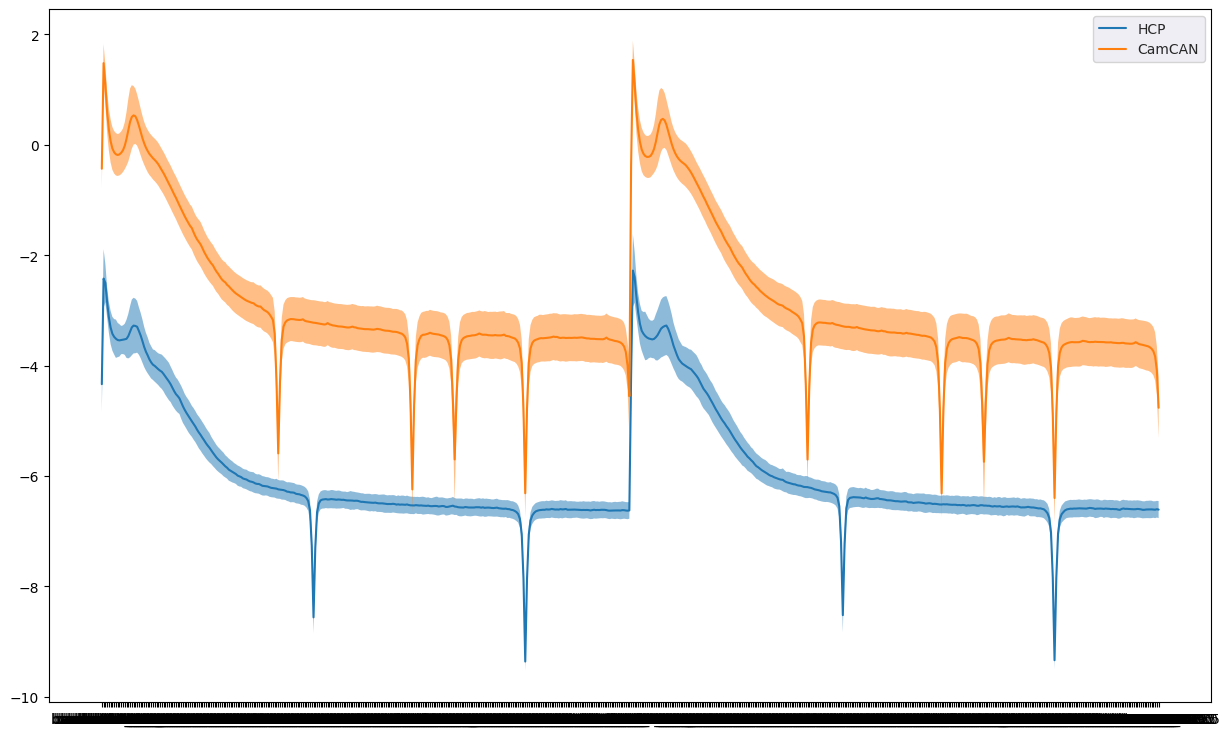

In [41]:
fig, ax = plt.subplots(figsize = (15, 9))

begin = 0
end = 600

with sns.axes_style("darkgrid"):
    ax.plot(avg_HCP[begin:end], label='HCP')
    ax.fill_between(range(end-begin), avg_HCP[begin:end] - std_HCP[begin:end], avg_HCP[begin:end] + std_HCP[begin:end], alpha = 0.5)
    
    ax.plot(avg_CamCAN[begin:end], label='CamCAN')
    ax.fill_between(range(end-begin), avg_CamCAN[begin:end] - std_CamCAN[begin:end], avg_CamCAN[begin:end] + std_CamCAN[begin:end], alpha = 0.5)
    
    ax.legend()

#### Difference between PSD record 1 vs record 2

In [42]:
# Import the datasets

HCP_PSD_1 = pd.read_csv("new_Data/record_1_DK.csv", index_col=0)
HCP_PSD_2 = pd.read_csv("new_Data/record_2_DK.csv", index_col=0)

ROIs = pd.read_csv("new_Data/dka_HCP_test.csv")
ROIs = ROIs["name"]
columns = [ROI + "_" + str(j/2) for ROI in ROIs for j in range(0, 300)]

CamCAN_PSD_1 = pd.read_csv('new_Data/record_1_CamCAN_DK.csv', index_col=0)
CamCAN_PSD_2 = pd.read_csv('new_Data/record_2_CamCAN_DK.csv', index_col=0)

# Drop columns 150 Hz pour HCP
col_to_drop = [c for c in HCP_PSD_1.columns if float(re.search("[0-9]+\.[0-9]*", c).group(0)) == 150.0]
HCP_PSD_1 = HCP_PSD_1.drop(columns = col_to_drop)
HCP_PSD_2 = HCP_PSD_2.drop(columns = col_to_drop)

In [43]:
# Log everything

HCP_PSD_1 = np.log(HCP_PSD_1)
HCP_PSD_2 = np.log(HCP_PSD_2)

CamCAN_PSD_1 = np.log(CamCAN_PSD_1)
CamCAN_PSD_2 = np.log(CamCAN_PSD_2)

In [44]:
# Compute the distance between recording 1 and recording 2 for every feature

diff_PSD_CamCAN = np.square(CamCAN_PSD_1 - CamCAN_PSD_2)
diff_PSD_HCP = np.square(HCP_PSD_1 - HCP_PSD_2)


In [45]:
# Let's compute the avg and std

avg_HCP = np.mean(diff_PSD_HCP, axis = 0)
avg_CamCAN = np.mean(diff_PSD_CamCAN, axis = 0)

std_HCP = np.std(diff_PSD_HCP, axis = 0)
std_CamCAN = np.std(diff_PSD_CamCAN, axis = 0)

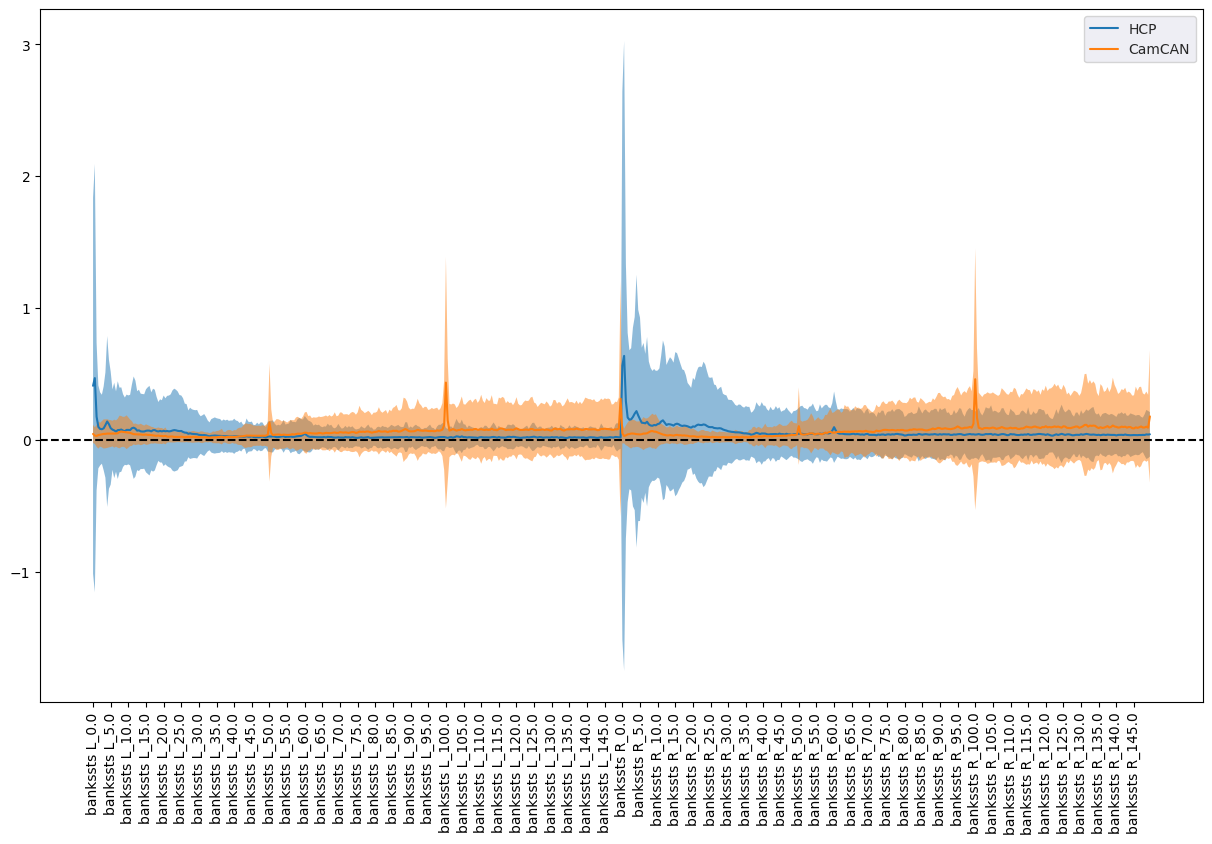

In [46]:
fig, ax = plt.subplots(figsize = (15, 9))

begin = 0
end = 600

with sns.axes_style("darkgrid"):
    ax.plot(avg_HCP[begin:end], label='HCP')
    ax.fill_between(avg_HCP[begin:end].index, avg_HCP[begin:end] - std_HCP[begin:end], avg_HCP[begin:end] + std_HCP[begin:end], alpha = 0.5)
    
    ax.plot(avg_CamCAN[begin:end], label='CamCAN')
    ax.fill_between(avg_CamCAN[begin:end].index, avg_CamCAN[begin:end] - std_CamCAN[begin:end], avg_CamCAN[begin:end] + std_CamCAN[begin:end], alpha = 0.5)
    
    ax.tick_params(axis='x', labelrotation=90)
    plt.xticks(avg_CamCAN[begin:end].index[0::10])
    plt.axhline(y=0, color='k', linestyle='--')

    ax.legend()

#### Difference between individuals within a dataset

In [47]:
# Let's compute the avg and std

avg_HCP = np.mean(HCP_PSD, axis = 0)
avg_CamCAN = np.mean(CamCAN_PSD, axis = 0)

std_HCP = np.std(HCP_PSD, axis = 0)
std_CamCAN = np.std(CamCAN_PSD, axis = 0)

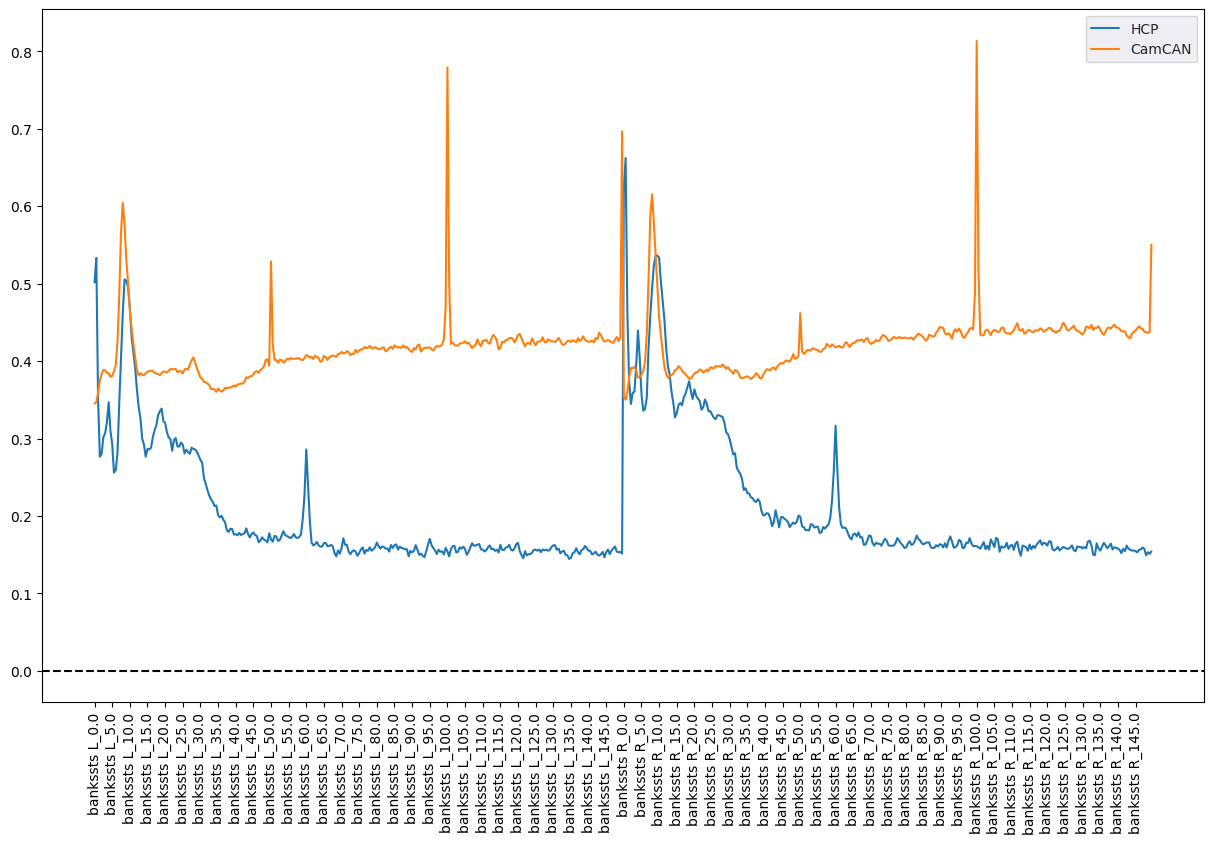

In [48]:
# Let's plot the standard deviation, representative of how different are the individuals within a cohort
fig, ax = plt.subplots(figsize = (15, 9))

begin = 0
end = 600

with sns.axes_style("darkgrid"):
    ax.plot(std_HCP[begin:end], label='HCP')
    
    ax.plot(std_CamCAN[begin:end], label='CamCAN')

    ax.tick_params(axis='x', labelrotation=90)
    plt.xticks(avg_CamCAN[begin:end].index[0::10])
    plt.axhline(y=0, color='k', linestyle='--')

    ax.legend()

**Results -** The difference in ICCs seem to be more driven by the inter-individual differences than the stability of the feature within individuals\

But, maybe this inter-individual differences is super large because we take into account every range of age, what about only with young people ?

### Only for young people

In [49]:
# Import the datasets

HCP_PSD = pd.read_csv("new_Data/record_1_DK.csv", index_col=0)

ROIs = pd.read_csv("new_Data/dka_HCP_test.csv")
ROIs = ROIs["name"]
columns = [ROI + "_" + str(j/2) for ROI in ROIs for j in range(0, 300)]

CamCAN_PSD = pd.read_csv('new_Data/PSD_Rest.csv', header=None)
CamCAN_PSD.columns = columns

# Drop columns 150 Hz pour HCP
col_to_drop = [c for c in HCP_PSD.columns if float(re.search("[0-9]+\.[0-9]*", c).group(0)) == 150.0]
HCP_PSD = HCP_PSD.drop(columns = col_to_drop)

In [50]:
# Let's only select young people

demographics_CamCAN = pd.read_csv('new_Data/demographics_4_Guilia.csv')

mask_young = demographics_CamCAN["Group"] == "young adult"
CamCAN_PSD = CamCAN_PSD[mask_young]

In [51]:
# Let's normalize to have the same range
HCP_PSD = np.log(HCP_PSD)
CamCAN_PSD = np.log(CamCAN_PSD)

In [52]:
# Let's compute the avg and std

avg_HCP = np.mean(HCP_PSD, axis = 0)
avg_CamCAN = np.mean(CamCAN_PSD, axis = 0)

std_HCP = np.std(HCP_PSD, axis = 0)
std_CamCAN = np.std(CamCAN_PSD, axis = 0)

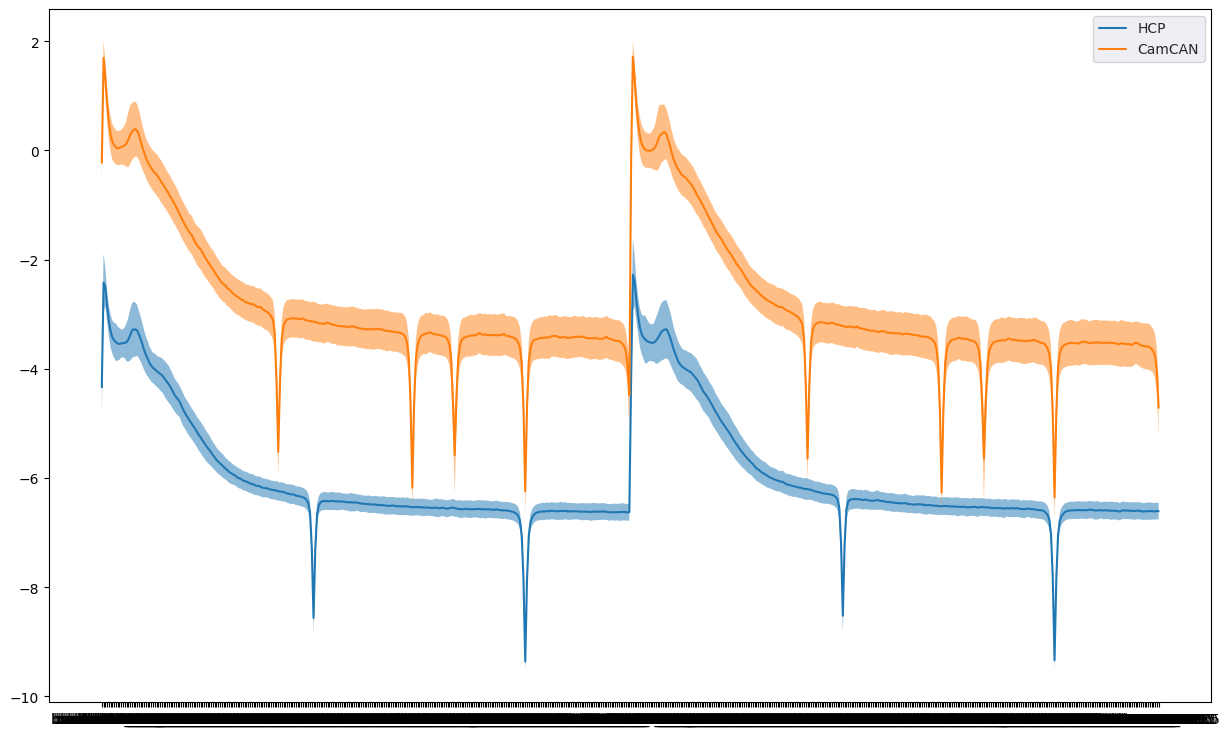

In [53]:
fig, ax = plt.subplots(figsize = (15, 9))

begin = 0
end = 600

with sns.axes_style("darkgrid"):
    ax.plot(avg_HCP[begin:end], label='HCP')
    ax.fill_between(range(end-begin), avg_HCP[begin:end] - std_HCP[begin:end], avg_HCP[begin:end] + std_HCP[begin:end], alpha = 0.5)
    
    ax.plot(avg_CamCAN[begin:end], label='CamCAN')
    ax.fill_between(range(end-begin), avg_CamCAN[begin:end] - std_CamCAN[begin:end], avg_CamCAN[begin:end] + std_CamCAN[begin:end], alpha = 0.5)
    
    ax.legend()

#### Difference between PSD record 1 vs record 2

In [54]:
# Import the datasets

HCP_PSD_1 = pd.read_csv("new_Data/record_1_DK.csv", index_col=0)
HCP_PSD_2 = pd.read_csv("new_Data/record_2_DK.csv", index_col=0)

ROIs = pd.read_csv("new_Data/dka_HCP_test.csv")
ROIs = ROIs["name"]
columns = [ROI + "_" + str(j/2) for ROI in ROIs for j in range(0, 300)]

CamCAN_PSD_1 = pd.read_csv('new_Data/record_1_CamCAN_DK.csv', index_col=0)
CamCAN_PSD_2 = pd.read_csv('new_Data/record_2_CamCAN_DK.csv', index_col=0)

# Drop columns 150 Hz pour HCP
col_to_drop = [c for c in HCP_PSD_1.columns if float(re.search("[0-9]+\.[0-9]*", c).group(0)) == 150.0]
HCP_PSD_1 = HCP_PSD_1.drop(columns = col_to_drop)
HCP_PSD_2 = HCP_PSD_2.drop(columns = col_to_drop)

In [55]:
# Let's keep only the young adults

CamCAN_PSD_1 = CamCAN_PSD_1[mask_young]
CamCAN_PSD_2 = CamCAN_PSD_2[mask_young]

In [56]:
# Log everything

HCP_PSD_1 = np.log(HCP_PSD_1)
HCP_PSD_2 = np.log(HCP_PSD_2)

CamCAN_PSD_1 = np.log(CamCAN_PSD_1)
CamCAN_PSD_2 = np.log(CamCAN_PSD_2)

In [57]:
diff_PSD_CamCAN = np.square(CamCAN_PSD_1 - CamCAN_PSD_2)
diff_PSD_HCP = np.square(HCP_PSD_1 - HCP_PSD_2)


In [58]:
# Let's compute the avg and std

avg_HCP = np.mean(diff_PSD_HCP, axis = 0)
avg_CamCAN = np.mean(diff_PSD_CamCAN, axis = 0)

std_HCP = np.std(diff_PSD_HCP, axis = 0)
std_CamCAN = np.std(diff_PSD_CamCAN, axis = 0)

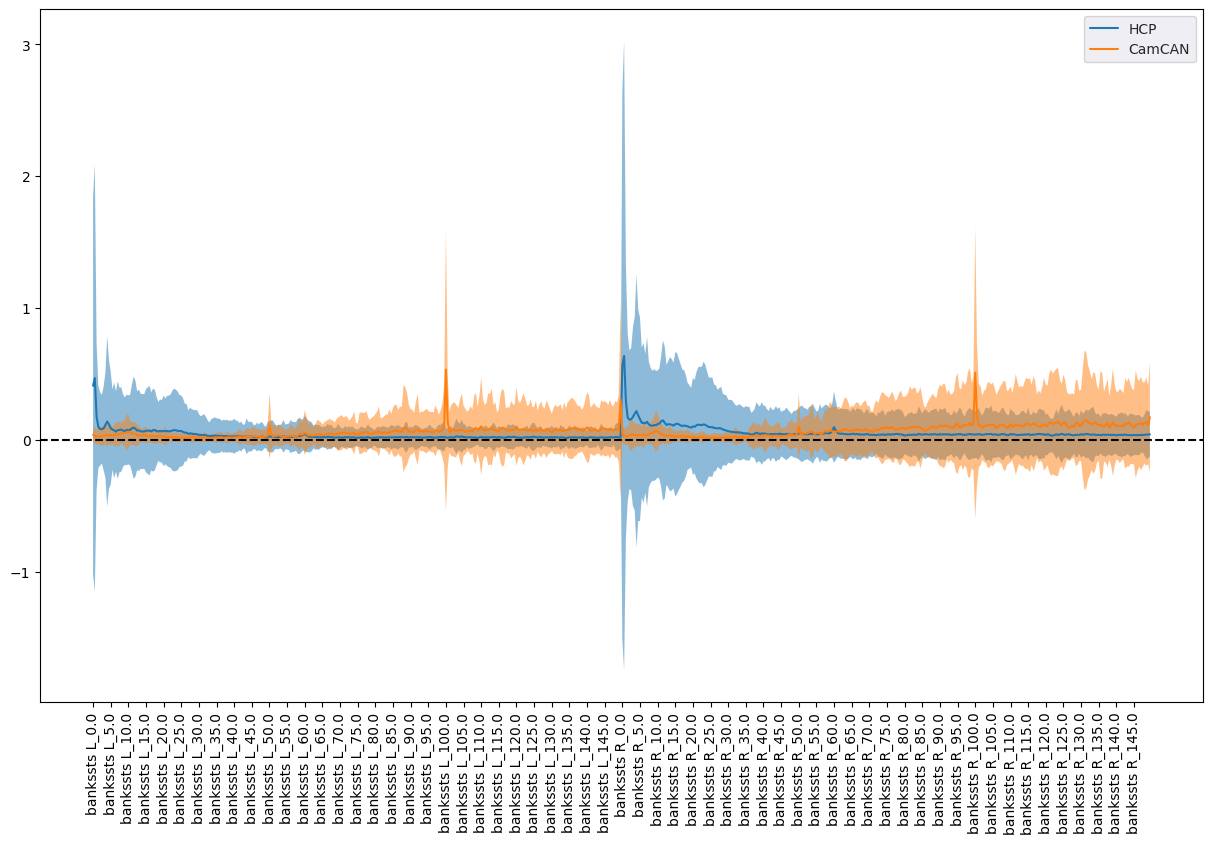

In [59]:
fig, ax = plt.subplots(figsize = (15, 9))

begin = 0
end = 600

with sns.axes_style("darkgrid"):
    ax.plot(avg_HCP[begin:end], label='HCP')
    ax.fill_between(avg_HCP[begin:end].index, avg_HCP[begin:end] - std_HCP[begin:end], avg_HCP[begin:end] + std_HCP[begin:end], alpha = 0.5)
    
    ax.plot(avg_CamCAN[begin:end], label='CamCAN')
    ax.fill_between(avg_CamCAN[begin:end].index, avg_CamCAN[begin:end] - std_CamCAN[begin:end], avg_CamCAN[begin:end] + std_CamCAN[begin:end], alpha = 0.5)
    
    ax.tick_params(axis='x', labelrotation=90)
    plt.xticks(avg_CamCAN[begin:end].index[0::10])
    plt.axhline(y=0, color='k', linestyle='--')

    ax.legend()

#### Difference between individuals

In [60]:
# Let's compute the avg and std

avg_HCP = np.mean(HCP_PSD, axis = 0)
avg_CamCAN = np.mean(CamCAN_PSD, axis = 0)

std_HCP = np.std(HCP_PSD, axis = 0)
std_CamCAN = np.std(CamCAN_PSD, axis = 0)

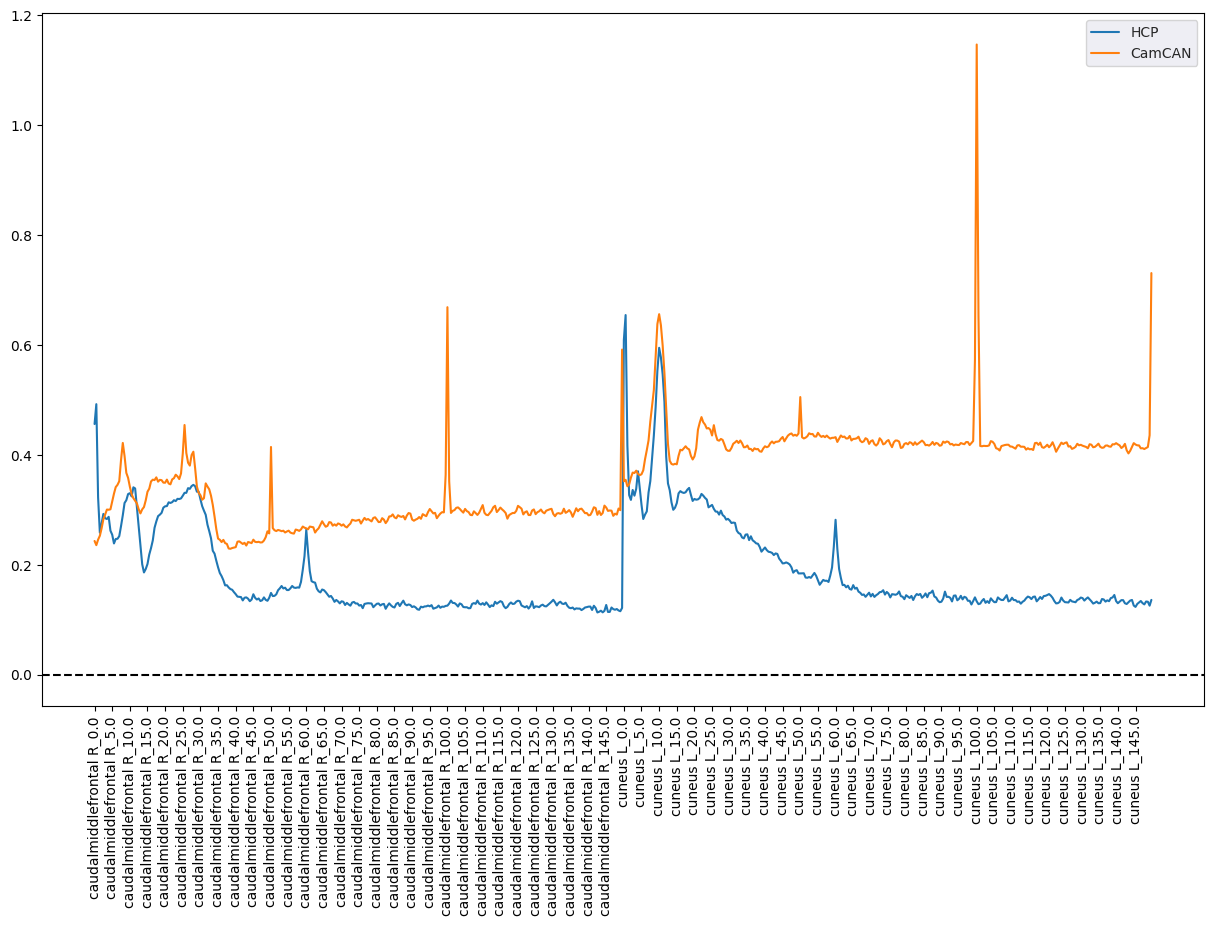

In [61]:
fig, ax = plt.subplots(figsize = (15, 9))

begin = 1500
end = 2100

with sns.axes_style("darkgrid"):
    ax.plot(std_HCP[begin:end], label='HCP')
    
    ax.plot(std_CamCAN[begin:end], label='CamCAN')

    ax.tick_params(axis='x', labelrotation=90)
    plt.xticks(avg_CamCAN[begin:end].index[0::10])
    plt.axhline(y=0, color='k', linestyle='--')

    ax.legend()

In [62]:
avg_per_freq_CamCAN = np.mean(np.array(std_CamCAN).reshape(-1, 300), axis = 0)
avg_per_freq_HCP = np.mean(np.array(std_HCP).reshape(-1, 300), axis = 0)

std_per_freq_CamCAN = np.std(np.array(std_CamCAN).reshape(-1, 300), axis = 0)
std_per_freq_HCP = np.std(np.array(std_HCP).reshape(-1, 300), axis = 0)

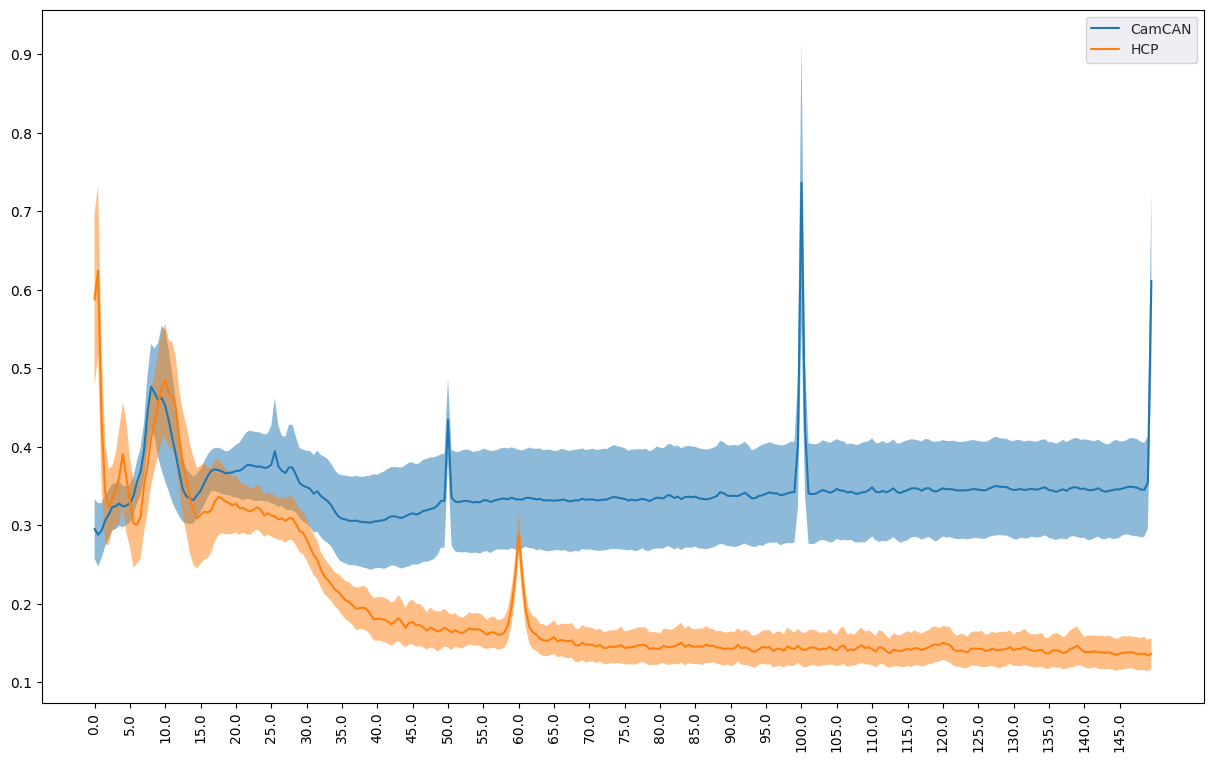

In [63]:
fig, ax = plt.subplots(figsize = (15, 9))

begin = 0
end = 600

with sns.axes_style("darkgrid"):
    ax.plot(avg_per_freq_CamCAN, label='CamCAN')
    ax.fill_between(HCP_ICC_per_freq_avg.index, avg_per_freq_CamCAN - std_per_freq_CamCAN, avg_per_freq_CamCAN + std_per_freq_CamCAN, alpha = 0.5)
    
    ax.plot(avg_per_freq_HCP, label='HCP')
    ax.fill_between(HCP_ICC_per_freq_avg.index, avg_per_freq_HCP - std_per_freq_HCP, avg_per_freq_HCP + std_per_freq_HCP, alpha = 0.5)
    
    ax.tick_params(axis='x', labelrotation=90)
    plt.xticks(HCP_ICC_per_freq_avg.index[0::10])
    ax.legend()

### After regressing the site effects

In [64]:
### Let's remove site effect

# 1. Regress site effect

data = np.concatenate([CamCAN_PSD, HCP_PSD], axis = 0)
site = np.concatenate([np.zeros(len(CamCAN_PSD)), np.ones(len(HCP_PSD))]).reshape(-1, 1)
data = np.concatenate([data, site], axis = 1)

X = data[:,-1:].astype(np.int64)
y = data[:, :-1]

ros = RandomOverSampler(random_state=0)
y_resampled, X_resampled = ros.fit_resample(y, X)
X_resampled = X_resampled.reshape(-1, 1)

model = LinearRegression()

model.fit(X_resampled, y_resampled)

# 2. Remove site effect

CamCAN_PSD_regressed = CamCAN_PSD - model.predict([[0]]) + np.concatenate([model.intercept_.reshape(1, -1)]*len(CamCAN_PSD), axis=0)
HCP_PSD_regressed = HCP_PSD - model.predict([[1]]) + np.concatenate([model.intercept_.reshape(1, -1)]*len(HCP_PSD), axis=0)

In [65]:
# Let's compute the avg and std

avg_HCP = np.mean(HCP_PSD_regressed, axis = 0)
avg_CamCAN = np.mean(CamCAN_PSD_regressed, axis = 0)

std_HCP = np.std(HCP_PSD_regressed, axis = 0)
std_CamCAN = np.std(CamCAN_PSD_regressed, axis = 0)

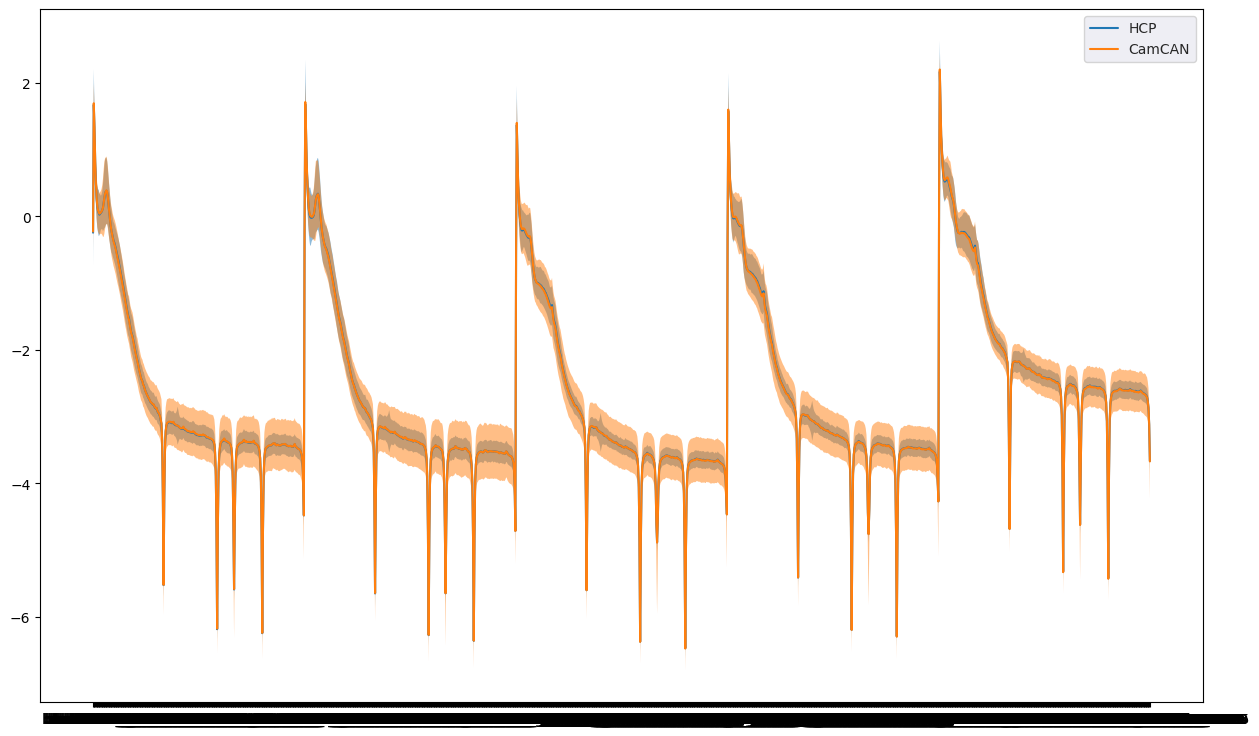

In [66]:
fig, ax = plt.subplots(figsize = (15, 9))

begin = 0
end = 1500

with sns.axes_style("darkgrid"):
    ax.plot(avg_HCP[begin:end], label='HCP')
    ax.fill_between(range(end-begin), avg_HCP[begin:end] - std_HCP[begin:end], avg_HCP[begin:end] + std_HCP[begin:end], alpha = 0.5)
    
    ax.plot(avg_CamCAN[begin:end], label='CamCAN')
    ax.fill_between(range(end-begin), avg_CamCAN[begin:end] - std_CamCAN[begin:end], avg_CamCAN[begin:end] + std_CamCAN[begin:end], alpha = 0.5)
    
    ax.legend()

#### Difference between PSD record 1 vs record 2

In [67]:
# Import the datasets

HCP_PSD_1 = pd.read_csv("new_Data/record_1_DK.csv", index_col=0)
HCP_PSD_2 = pd.read_csv("new_Data/record_2_DK.csv", index_col=0)

ROIs = pd.read_csv("new_Data/dka_HCP_test.csv")
ROIs = ROIs["name"]
columns = [ROI + "_" + str(j/2) for ROI in ROIs for j in range(0, 300)]

CamCAN_PSD_1 = pd.read_csv('new_Data/record_1_CamCAN_DK.csv', index_col=0)
CamCAN_PSD_2 = pd.read_csv('new_Data/record_2_CamCAN_DK.csv', index_col=0)

# Drop columns 150 Hz pour HCP
col_to_drop = [c for c in HCP_PSD_1.columns if float(re.search("[0-9]+\.[0-9]*", c).group(0)) == 150.0]
HCP_PSD_1 = HCP_PSD_1.drop(columns = col_to_drop)
HCP_PSD_2 = HCP_PSD_2.drop(columns = col_to_drop)

In [68]:
# Log everything

HCP_PSD_1 = np.log(HCP_PSD_1)
HCP_PSD_2 = np.log(HCP_PSD_2)

CamCAN_PSD_1 = np.log(CamCAN_PSD_1)
CamCAN_PSD_2 = np.log(CamCAN_PSD_2)

In [69]:
### Let's remove site effect

# 1. Regress site effect

data = np.concatenate([CamCAN_PSD_1, CamCAN_PSD_2, HCP_PSD_1, HCP_PSD_2], axis = 0)
site = np.concatenate([np.zeros(len(CamCAN_PSD_1)), np.zeros(len(CamCAN_PSD_2)), np.ones(len(HCP_PSD_1)), np.ones(len(HCP_PSD_2))]).reshape(-1, 1)
data = np.concatenate([data, site], axis = 1)

X = data[:,-1:].astype(np.int64)
y = data[:, :-1]

ros = RandomOverSampler(random_state=0)
y_resampled, X_resampled = ros.fit_resample(y, X)
X_resampled = X_resampled.reshape(-1, 1)

model = LinearRegression()

model.fit(X_resampled, y_resampled)

# 2. Remove site effect

CamCAN_PSD_regressed_1 = CamCAN_PSD_1 - model.predict([[0]]) + np.concatenate([model.intercept_.reshape(1, -1)]*len(CamCAN_PSD_1), axis=0)
CamCAN_PSD_regressed_2 = CamCAN_PSD_2 - model.predict([[0]]) + np.concatenate([model.intercept_.reshape(1, -1)]*len(CamCAN_PSD_2), axis=0)

HCP_PSD_regressed_1 = HCP_PSD_1 - model.predict([[1]]) + np.concatenate([model.intercept_.reshape(1, -1)]*len(HCP_PSD_1), axis=0)
HCP_PSD_regressed_2 = HCP_PSD_2 - model.predict([[1]]) + np.concatenate([model.intercept_.reshape(1, -1)]*len(HCP_PSD_2), axis=0)

In [70]:
diff_PSD_CamCAN = np.square(CamCAN_PSD_regressed_1 - CamCAN_PSD_regressed_2)
diff_PSD_HCP = np.square(HCP_PSD_regressed_1 - HCP_PSD_regressed_2)

# Let's compute the avg and std

avg_HCP = np.mean(diff_PSD_HCP, axis = 0)
avg_CamCAN = np.mean(diff_PSD_CamCAN, axis = 0)

std_HCP = np.std(diff_PSD_HCP, axis = 0)
std_CamCAN = np.std(diff_PSD_CamCAN, axis = 0)

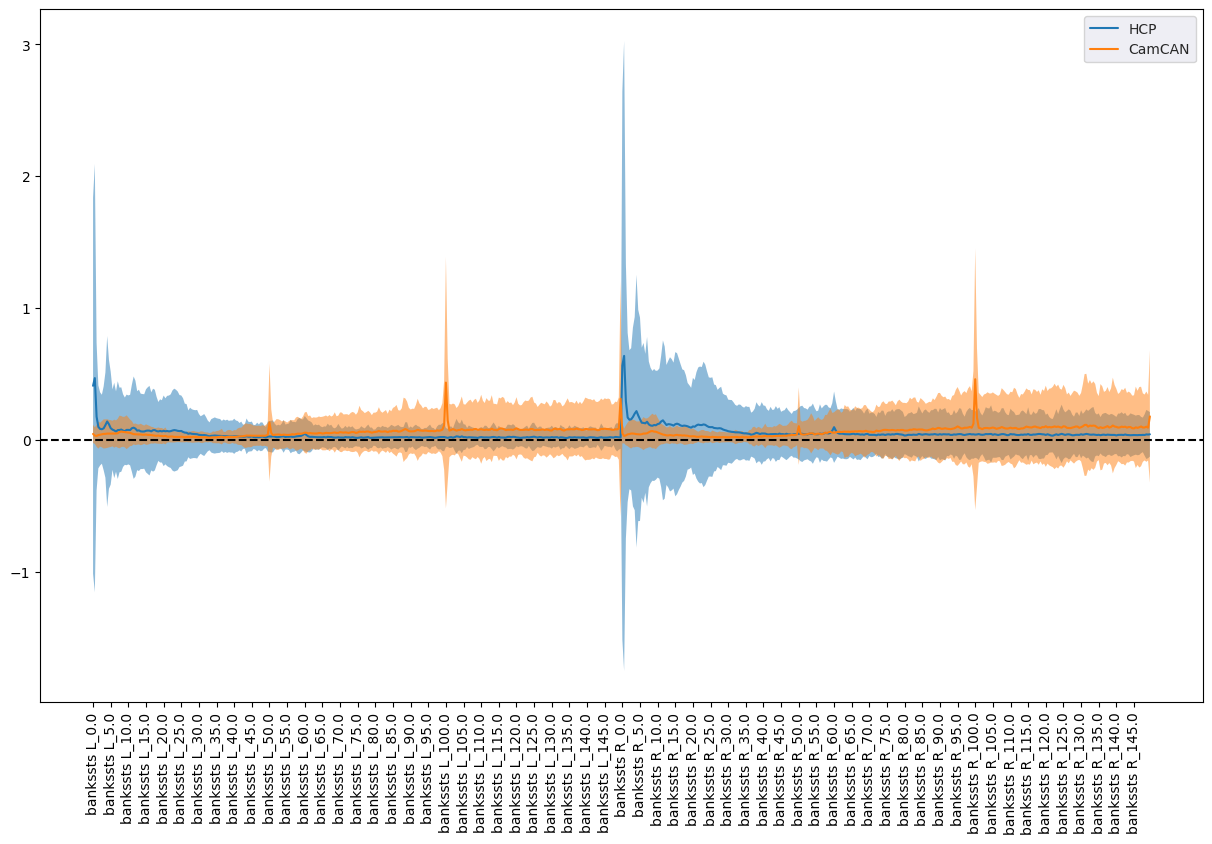

In [71]:
fig, ax = plt.subplots(figsize = (15, 9))

begin = 0
end = 600

with sns.axes_style("darkgrid"):
    ax.plot(avg_HCP[begin:end], label='HCP')
    ax.fill_between(avg_HCP[begin:end].index, avg_HCP[begin:end] - std_HCP[begin:end], avg_HCP[begin:end] + std_HCP[begin:end], alpha = 0.5)
    
    ax.plot(avg_CamCAN[begin:end], label='CamCAN')
    ax.fill_between(avg_CamCAN[begin:end].index, avg_CamCAN[begin:end] - std_CamCAN[begin:end], avg_CamCAN[begin:end] + std_CamCAN[begin:end], alpha = 0.5)
    
    ax.tick_params(axis='x', labelrotation=90)
    plt.xticks(avg_CamCAN[begin:end].index[0::10])
    plt.axhline(y=0, color='k', linestyle='--')

    ax.legend()

Ben en fait, vu qu'on retire la même valeur aux deux recordings, ca revient au meme ...

# Information selection subjects

## CamCAN

1.2. Data-collection stages

1.2.1. Stage 1

In Stage 1, 2681 participants were interviewed in their homes to
acquire demographic information; measures of cognitive, mental and
physical health; and lifestyle information. Tests of vision, hearing,
balance, and speeded response times were administered, and participants
completed detailed self-report questionnaires about their physical activity and life experiences. Neuropsychological tests included general cognitive assessments (MMSE, Folstein et al., 1975; ACE-R, Mioshi et al., 2006a,
2006b), tests of memory (logical memory from WMS-III UK, Wechsler,
1999), and verbal intelligence (Spot the Word, Baddeley et al., 1993).
Measures taken in Stage 1 additionally served to screen participants
for participation in Stage 2: To continue, participants were required to
be willing to continue, be cognitively healthy (MMSE N 24), to meet
hearing, vision, and English language ability criteria necessary for
completing experimental tasks, and to be free of MRI or MEG contraindications and neurological or serious psychiatric conditions.

1.2.2. Stage 2

In Stage 2, participants (target N = 700: 50 men, 50 women from
each age decade) were recruited to attend testing sessions at the
Medical Research Council (UK) Cognition and Brain Sciences Unit
(MRC-CBSU) in Cambridge, UK. Owing to recruitment problems for
the youngest decade (18–27), only 56 (27 men) were tested from this
decade. In this stage, structural and functional MRI scans, MEG recordings, and cognitive task data were collected over three separate
sessions. Structural and functional MRI scans collected in Stage 2 are
listed in Tables 1 and 2; MEG recordings are listed in Table 3; and
cognitive behavioural tasks are listed in Table 4. Physiological data
(height, weight, and blood pressure) were also collected, and a saliva
sample was taken for future genetic analysis. As the data from Stage 2
are the focus of the repository described in this paper, these data and
derived measures are described in more detail in Section 2.

## HCP

HCP recruited twins and their non-twin siblings with assistance from the Missouri Family Registry, which tracks birth record data for twins born in Missouri.

A key objective is to understand inter-individual variability of
brain circuits, including its genetic bases and its relation to behavior,
rather than merely aiming to determine the average, or typical connectivity in healthy adults. This will be achieved by sampling
300–400 young adult sibships of average size 3–4, with most of
these sibships including a MZ or DZ twin pair. All subjects will be between 22 and 35 years old, an age range chosen to represent healthy
adults beyond the age of major neurodevelopmental changes and before the onset of neurodegenerative changes. While the HCP will be
cross-sectional, many participants will be drawn from ongoing longitudinal studies (Sartor et al., 2011; Edens et al., 2010); they will have
extensive previous assessments, particularly with respect to history
of the presence or absence of emotional and behavioral problems.
This will allow us to recruit a sample of relatively healthy individuals
free of a prior history of significant psychiatric or neurological illnesses. Our goal is to capture a broad range of variability in healthy
individuals with respect to behavioral, ethnic, and socioeconomic diversity. We will define ‘healthy’ broadly, to avoid having an unduly
narrow ‘supernormal’ case series that might not be representative of the population at large. We will exclude sibships with individuals
having severe neurodevelopmental disorders (e.g. autism), documented neuropsychiatric disorders (e.g. schizophrenia or severe recurrent
depression) or neurologic disorders (e.g. Parkinson's disease), but will
include individuals who are smokers, are overweight, or have a history of heavy drinking or recreational drug use without having experienced severe symptoms (Supplemental Table S1 lists the full set of
inclusion and exclusion criteria under consideration). This strategy
will enable future connectivity studies on psychiatric patients, many
of whom smoke, are overweight, or have subclinical substance
use behaviors, to be compared to connectivity data on HCP ‘healthy
individuals’ having similar profiles. **Twins born prior to 34 weeks
gestation and non-twins born prior to 37 weeks gestation will be excluded**. This acknowledges the higher incidence of prematurity in
twins and focuses on exclusion of individuals born very prematurely.
Our initial screening will include a detailed questionnaire developed
explicitly for the HCP to determine presence or absence of the inclusion/exclusion criteria. This will be followed by an additional extensive, reliable, and valid psychiatric interview, the Semi-Structured
Assessment for the Genetics of Alcoholism (SSAGA, Bucholz et al.,
1994), to confirm the absence of significant psychiatric illness. This
will also allow us to include information about subthreshold psychiatric symptoms in the database, as analyses of such data may be of
interest to many researchers.
The utility of twin pairs in furthering our understanding of the
causes of human variation extends beyond estimating the contribution of genetic differences to individual variation (for classic early
studies, see Eaves, 1982 and Martin et al., 1997; for a discussion of
statistical analysis approaches, see Neale and Cardon, 1992). MZ
twinning occurs randomly, so MZ twin pairs should capture the full
range of genetic variability in a population. These twin pairs are genetically nearly identical; while they may share many aspects of rearing history and socioeconomic background, they also have withinpair variance due to differences in environmental exposures, stochastic processes and measurement error. Accordingly, assessment of
MZ twin pairs on its own is valuable in three distinct respects. (i) It provides a within-pair contrast for effects of environmental exposure
or physical or physiologic state (e.g. in pairs discordant for smoking,
overweight/obesity, or diabetes). (ii) It provides a lower-bound estimate of the test–retest reliability of various HCP measures. (It is a
lower bound because it reflects only genetic effects plus environmental effects shared by the twin pairs; however, it is especially valuable
in experiments that for technical reasons are non-repeatable.) (iii) It
provides an estimate of the covariance structure of multiple measures
that is uncontaminated by individual-specific stochastic and measurement error effects.
Dizygotic twin pairs are as genetically related as ordinary full siblings, but they share their childhood environment to a much greater
extent than do siblings of different ages. When added to MZ twin
data, DZ twin data thus allow estimation of the extent to which genotype, shared environment, and non-shared influences each contribute
to variation in traits. In multivariate analysis, this extends to understanding why traits A and B co-vary. The inclusion of additional siblings along with twins provides a further increase in statistical
power for resolving genetic and environmental influences
(Posthuma and Boomsma, 2000). These basic applications may be
elaborated to test for genotype× environment interaction effects,
where genetic influences are modified as a function of environmental
exposure or experimental manipulation; conditional effects (e.g. how
smoking status may affect connectivity patterns); and to test for certain strong directional models (event A leads to event B, rather than
vice versa) (Neale and Cardon, 1992).

Components of the Human Connectome Project - Recruitment
Study design:  Our goal is to recruit large groups of directly-related sibling children (each group is called a "sibship"). Wherever possible, each sibship would include 4 or more brothers or sisters. Thus, ideally we will recruit 300 families.  White non-Hispanic, Hispanic, Asian and African-American families will be invited to participate, to reflect the ethnic diversity of America.  Many of the families will include twin pairs, who may be either monozygotic (genetically identical) or dizygotic/fraternal (genetically no more related than ordinary full siblings). 

Recruiting large sibships will help maximize our chances of success for two important goals:

(i) heritability analyses:  quantifying how genetic differences between individuals contribute to differences in brain connectivity patterns and their possible correlations with cognitive, emotional and other task performance measures; and also estimating the importance of environmental influences, including influences of differences in environmental exposure and experience between siblings in the same family;

(ii) genetic association analyses: determining whether specific genetic variants contribute to differences in brain connectivity patterns.  In the long term, as research by others helps identify genetic variants or genetic profiles that are associated with differences in risk of psychiatric or neurologic conditions, or in differences in treatment response, we will be able to determine whether or not such variants/profiles are associated with differences in brain connectivity patterns in healthy young adults.  This may ultimately lead to improvements in diagnosis and individualized treatment.